In [1]:
%run -i env_default.py
%run -i src/notebook_base_light.py

2025-12-09 05:56:28.388436: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-09 05:56:28.388505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-09 05:56:28.389833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-09 05:56:28.397732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from src.datasets.road_anomaly import DatasetRoadAnomaly
dset = DatasetRoadAnomaly() # override the dataset location with dir_root = Path(...)
dset.discover()

Discovered 60 frames - DatasetFrameList()
Discovered 60 frames - DatasetFrameList()


DatasetFrameList()

In [3]:
from types import SimpleNamespace
import torch
from src.a05_differences.E1_article_evaluation import EvaluationDetectingUnexpected
from src.a01_sem_seg.deeplab_mobilenet_cityscapes_wrapper import DeepLabV3PlusMobileNetCityscapes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Build seg model
seg_model = DeepLabV3PlusMobileNetCityscapes(device=device)
seg_model.eval()

eval_obj = EvaluationDetectingUnexpected(sem_seg_variant = 'BaySegBdd')
eval_obj.init_semseg()

# print("Before override:", type(eval_obj.exp_semseg), type(getattr(eval_obj.exp_semseg, "net_mod", None)))
eval_obj.exp_semseg.net_mod = seg_model
# print("After  override:", type(eval_obj.exp_semseg), type(eval_obj.exp_semseg.net_mod))

eval_obj.storage

Using device: cuda
[DeepLabV3PlusMobileNetCityscapes] Loading checkpoint from exp/0300_DeepLabV3Plus_MobileNet_Cityscapes/best_deeplabv3plus_mobilenet_cityscapes_os16.pth
[DeepLabV3PlusMobileNetCityscapes] missing keys: []
[DeepLabV3PlusMobileNetCityscapes] unexpected keys: []
No checkpoint at at /home/tzh005/detecting-the-unexpected/exp/0120_BayesSegNet_BDD/chk_best.pth
Building net


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'pred_labels_trainIds': ChannelLoaderImage({channel.ctx.workdir}/{dset.name}_{dset.split}/sem_BaySegBdd/sem_labels/{fid}_predTrainIds.png),
 'pred_labels_colorimg': ChannelLoaderImage({channel.ctx.workdir}/{dset.name}_{dset.split}/sem_BaySegBdd/sem_labels/{fid}_predColorImg.png),
 'gen_image': ChannelLoaderImage({channel.ctx.workdir}/{dset.name}_{dset.split}/sem_BaySegBdd/gen_image/{fid}_gen_image.webp),
 'demo_with_labels': ChannelLoaderImage({channel.ctx.workdir}/{dset.name}_{dset.split}/sem_BaySegBdd/demo/{fid_no_slash}_pipeline.webp),
 'demo_with_baselines': ChannelLoaderImage({channel.ctx.workdir}/{dset.name}_{dset.split}/sem_BaySegBdd/demo/{fid_no_slash}_scores.webp),
 'anomaly_discrepancy_gen_only': ChannelLoaderHDF5({channel.ctx.workdir}/{dset.name}_{dset.split}/sem_BaySegBdd/anomaly_score/anomaly_discrepancy_gen_only.hdf5),
 'anomaly_discrepancy_label_and_gen': ChannelLoaderHDF5({channel.ctx.workdir}/{dset.name}_{dset.split}/sem_BaySegBdd/anomaly_score/anomaly_discrepancy_lab

## Semantic Segmentation + uncertainty

In [4]:
# eval_obj.init_semseg()

/home/tzh005/detecting-the-unexpected/src/common/jupyter_show_image.py:35: RuntimeWarning: divide by zero encountered in divide
  img_data = (img_data - vmin) * (1 / (vmax - vmin))
/home/tzh005/detecting-the-unexpected/src/common/jupyter_show_image.py:35: RuntimeWarning: invalid value encountered in multiply
  img_data = (img_data - vmin) * (1 / (vmax - vmin))



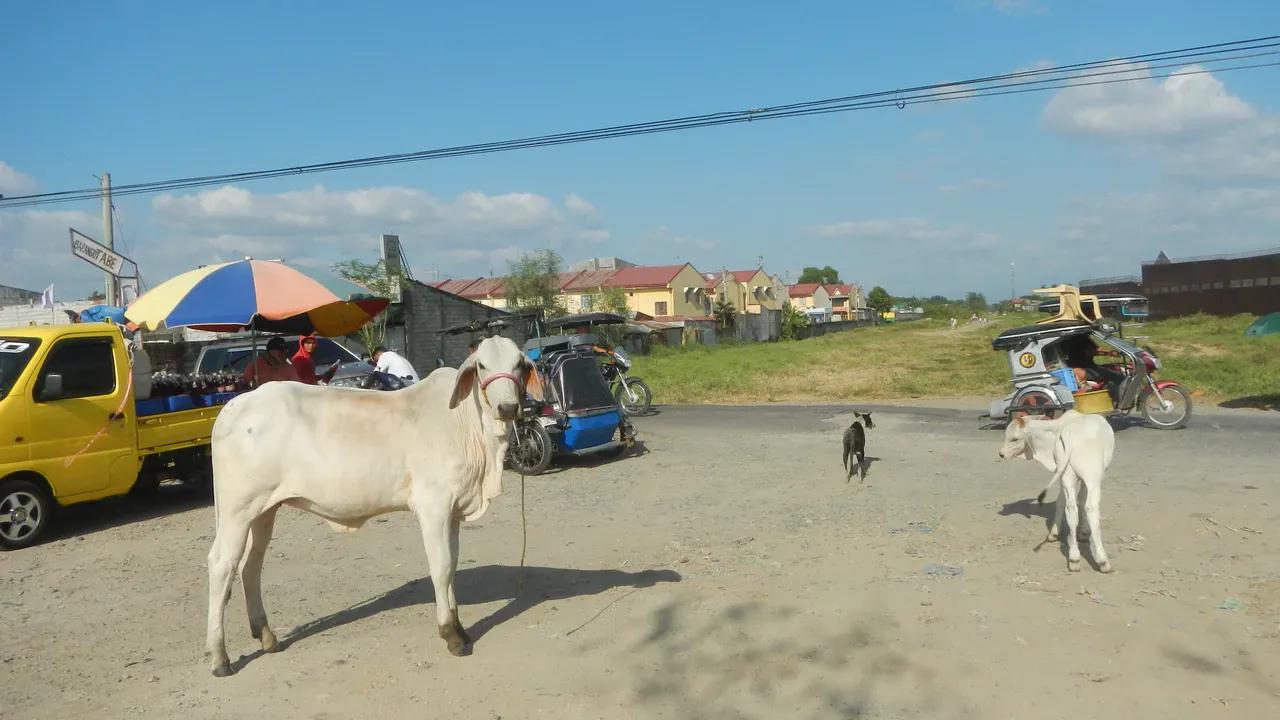
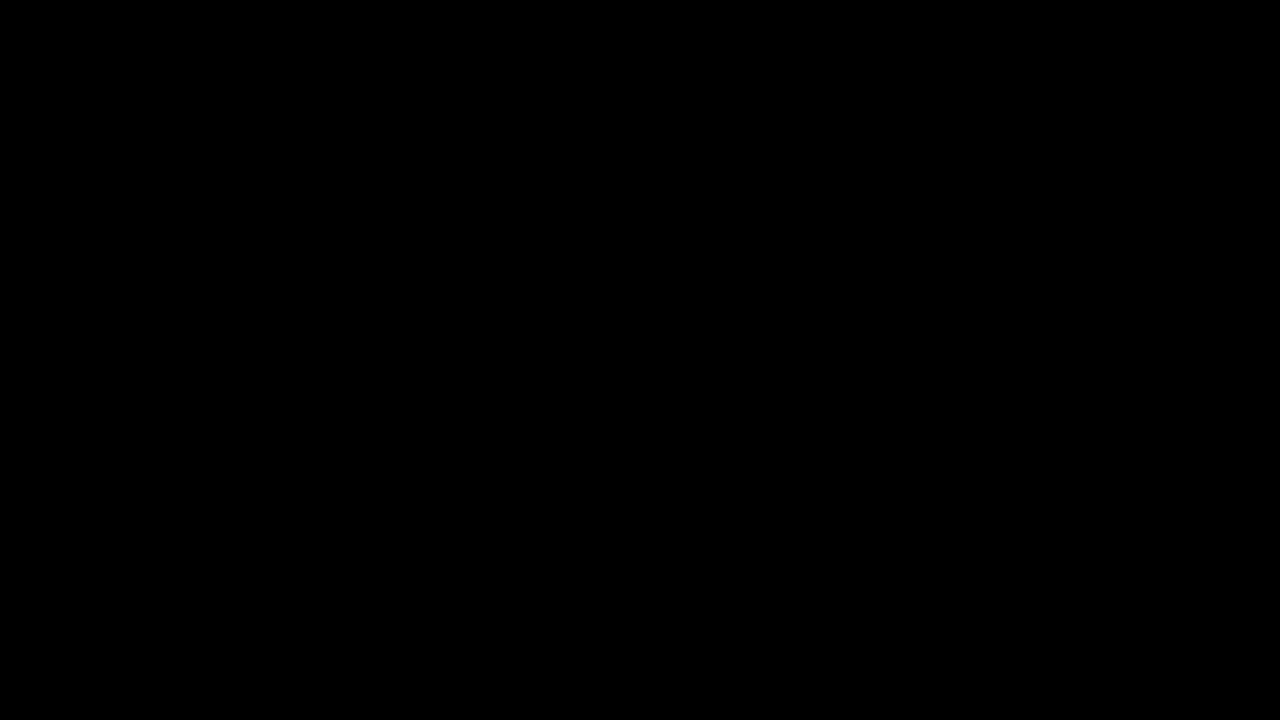
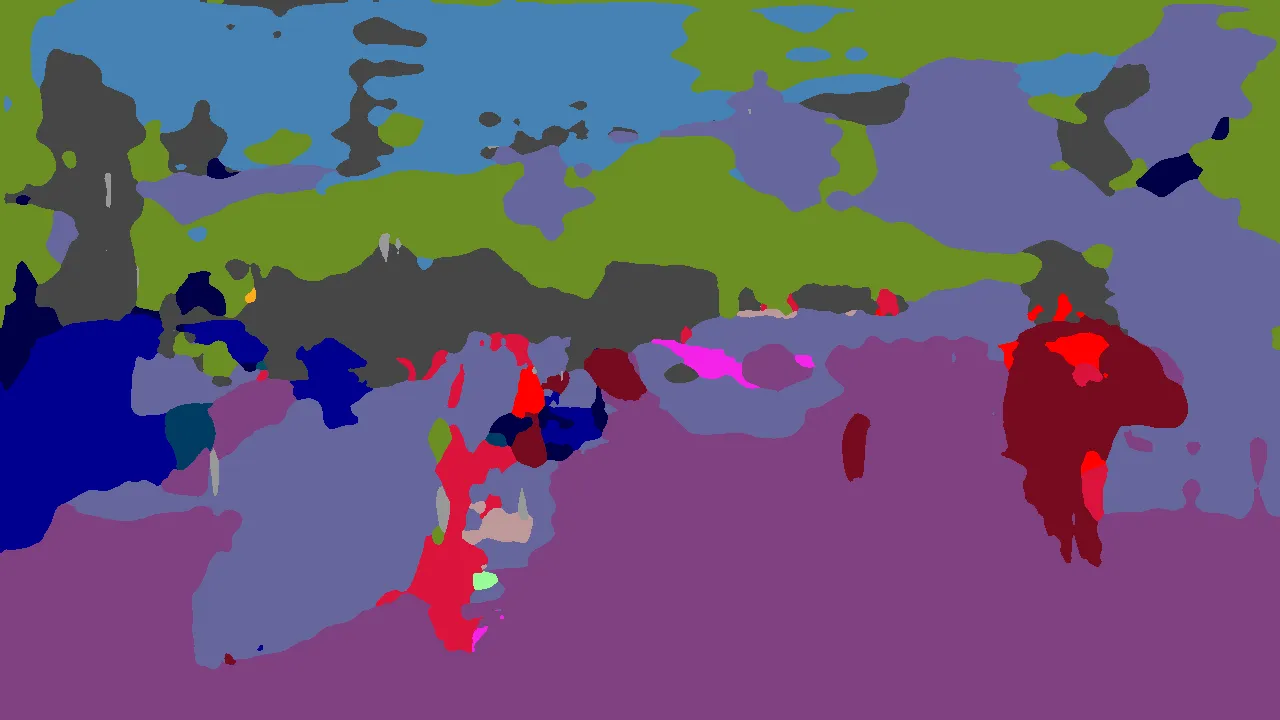


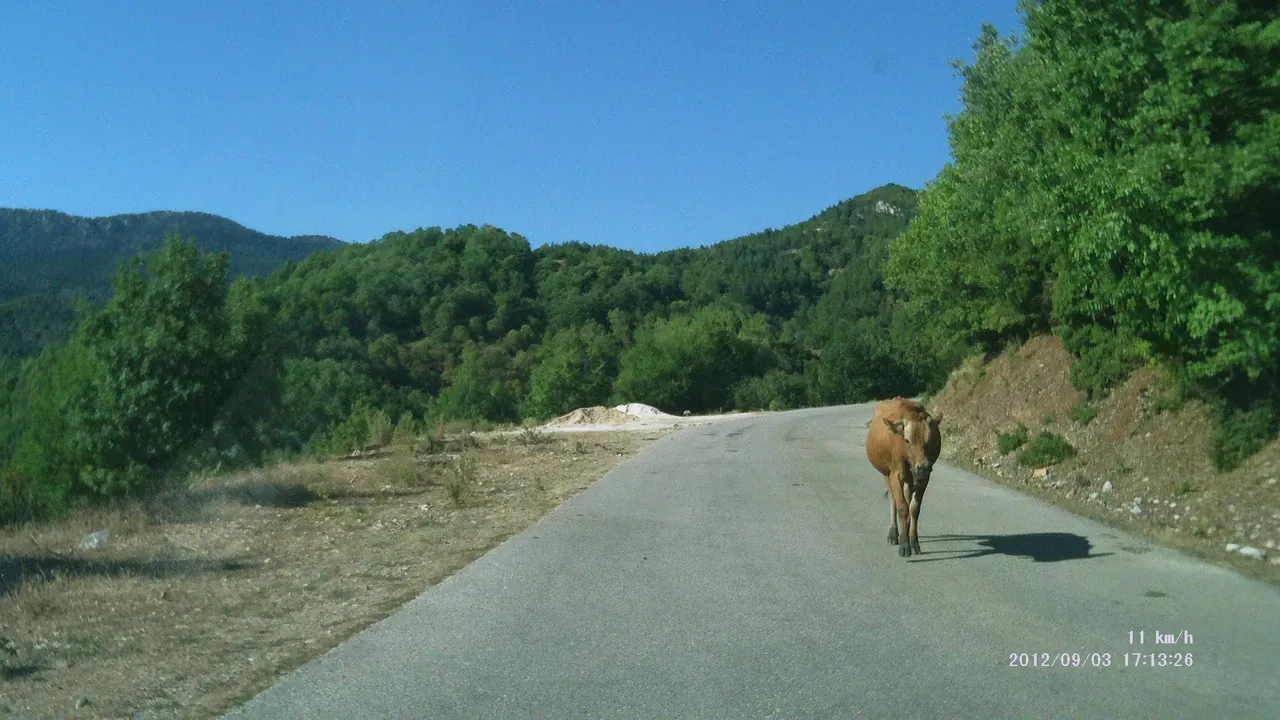
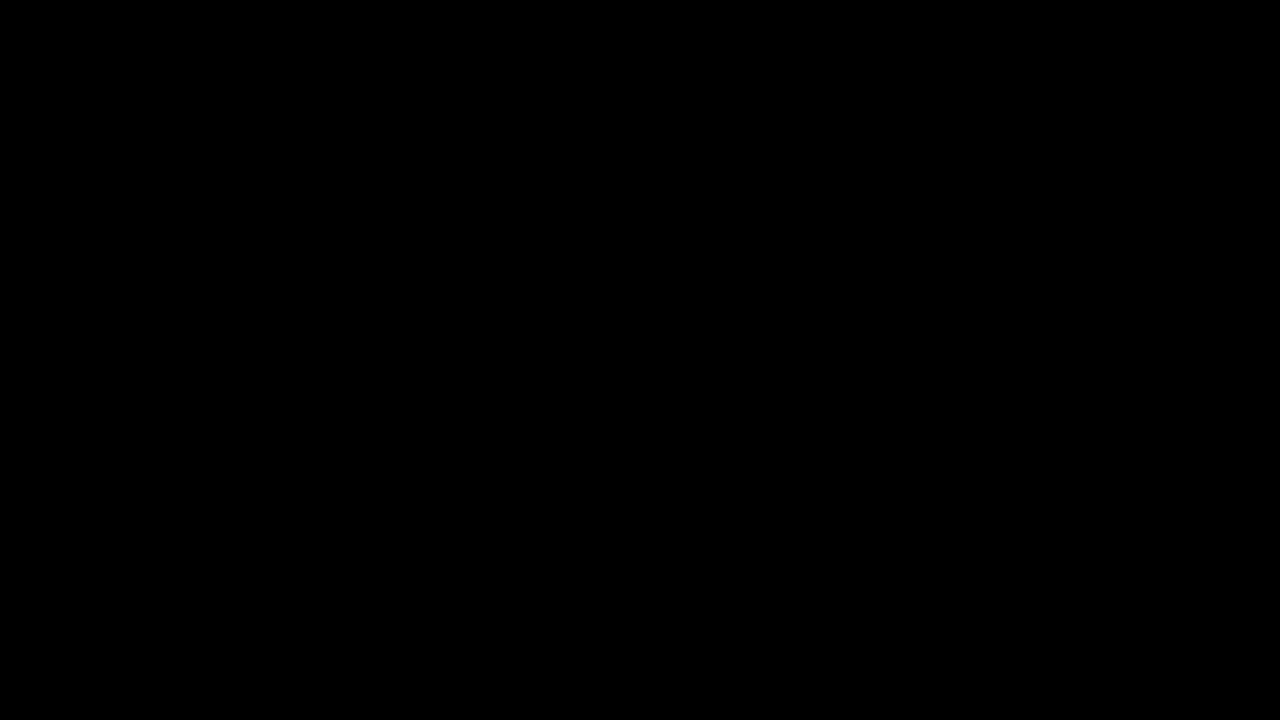
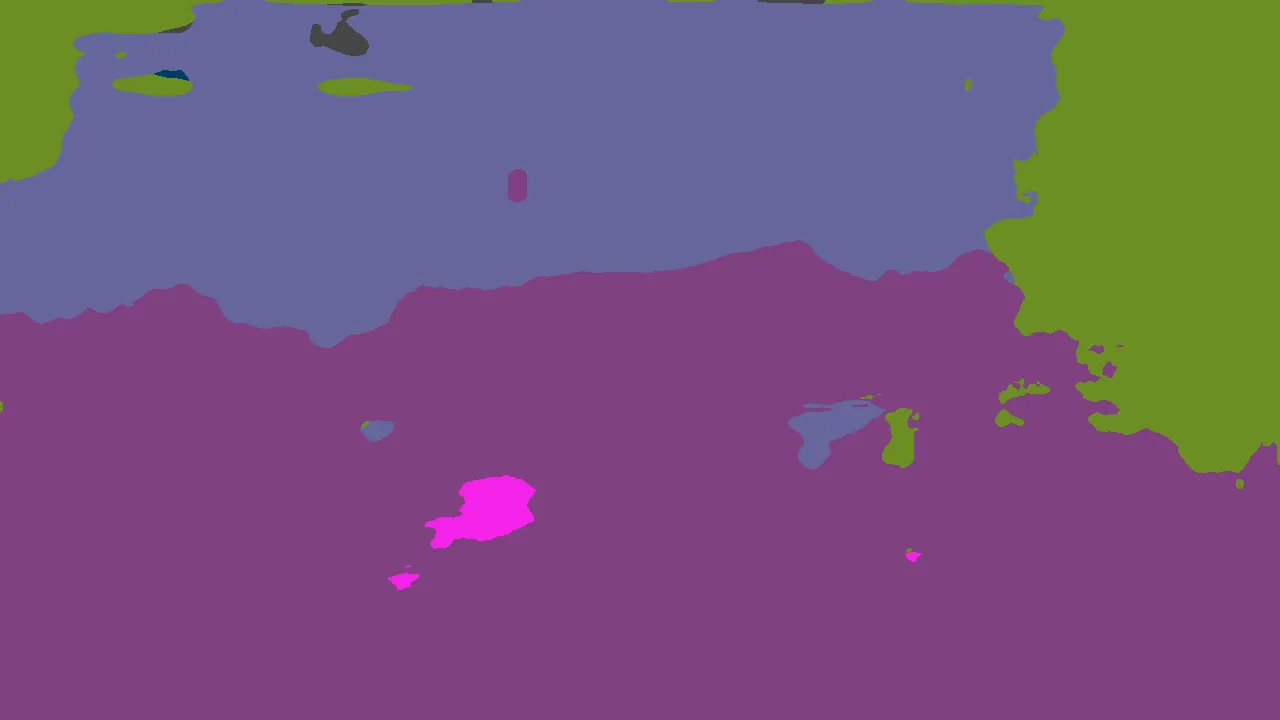


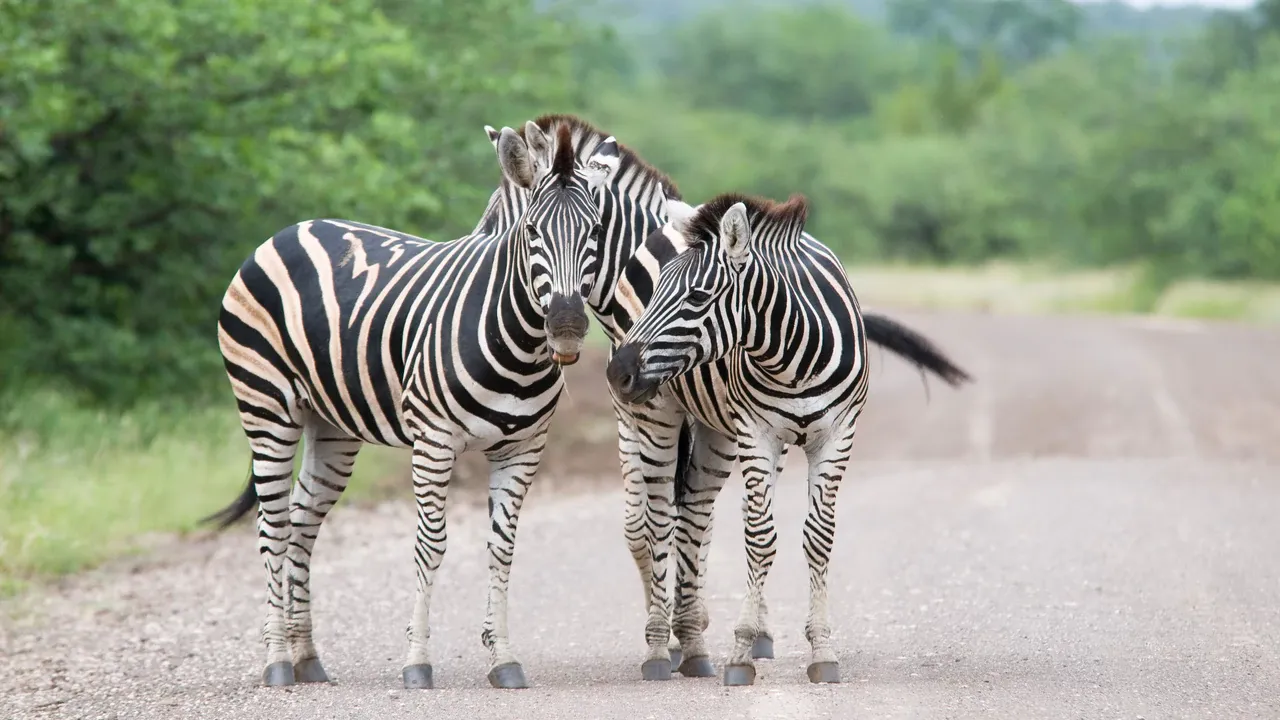
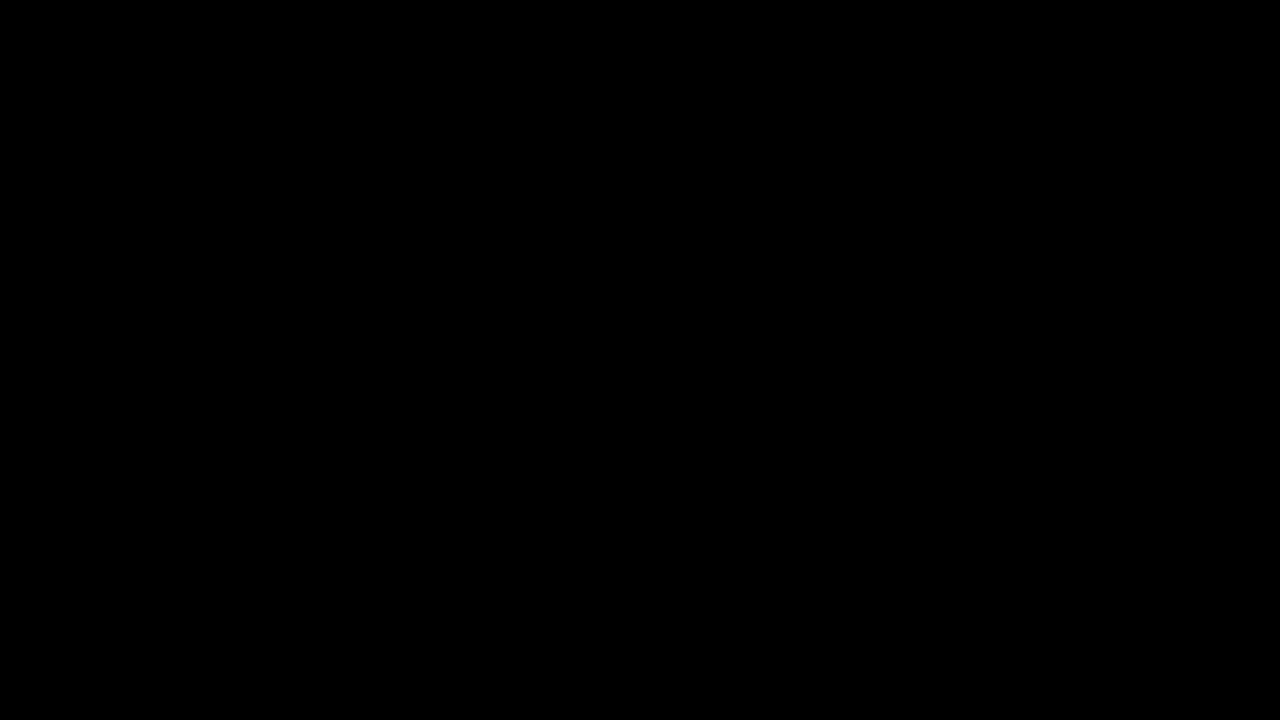
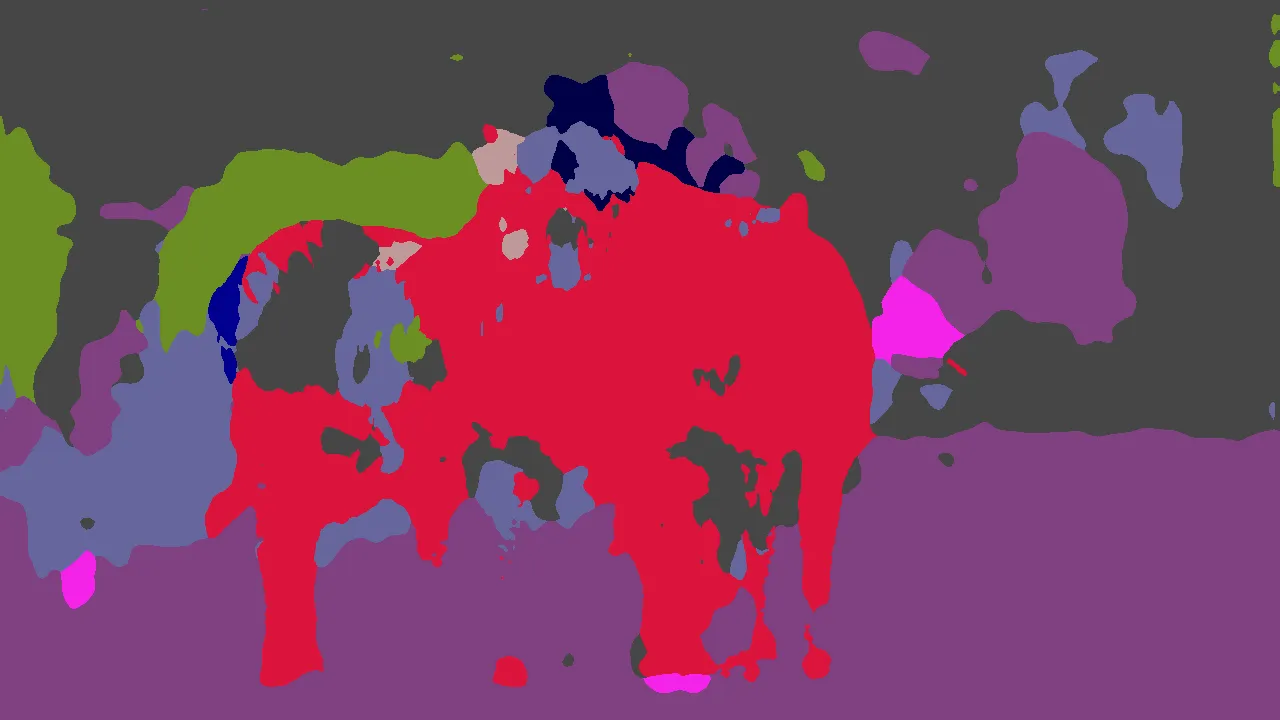


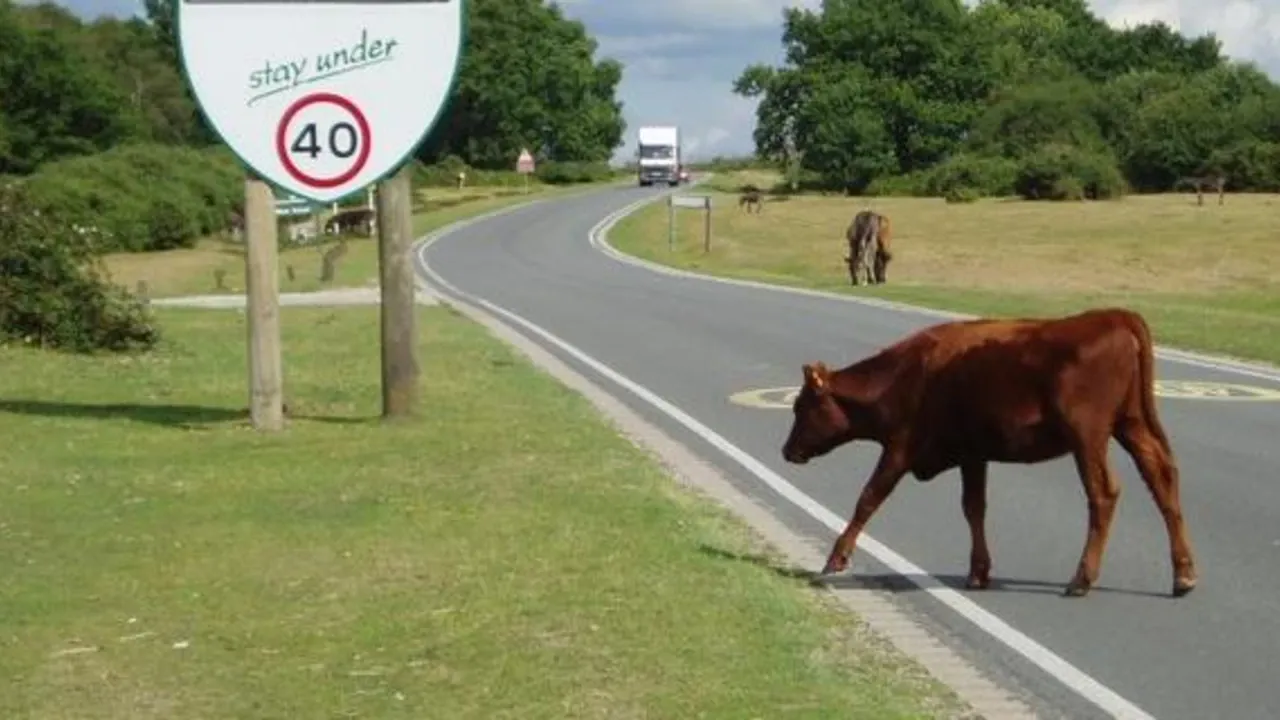
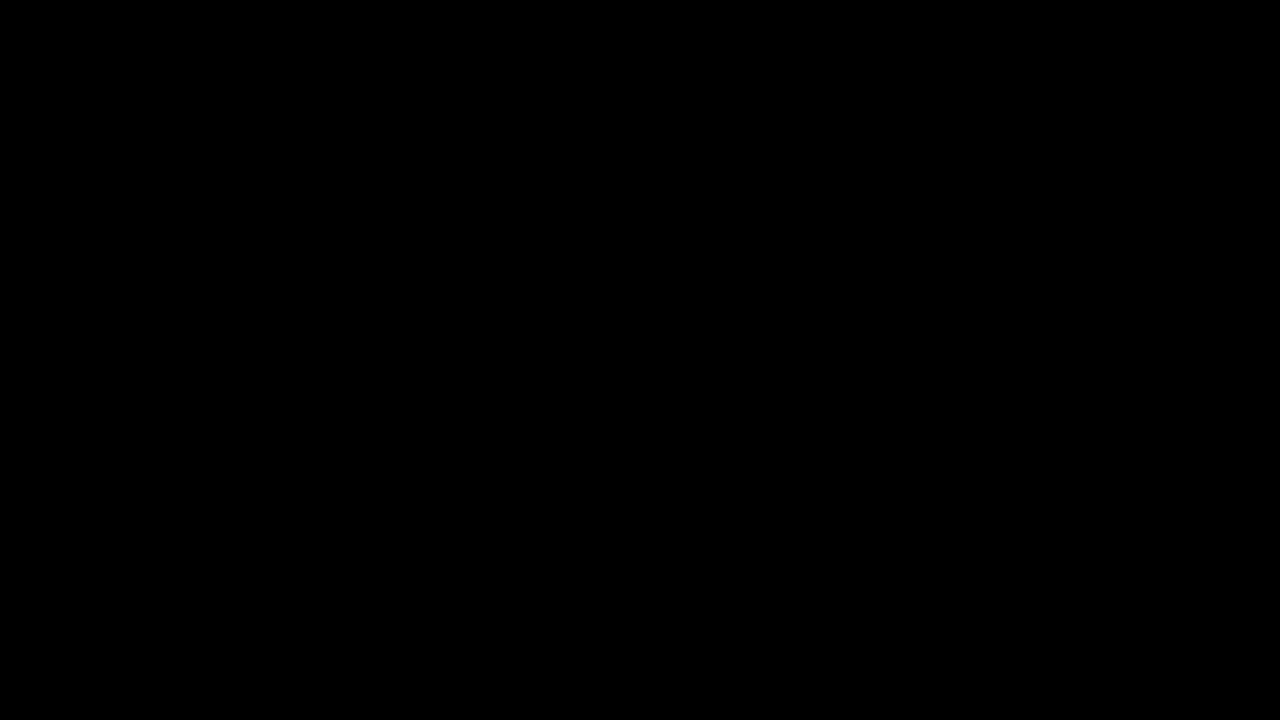
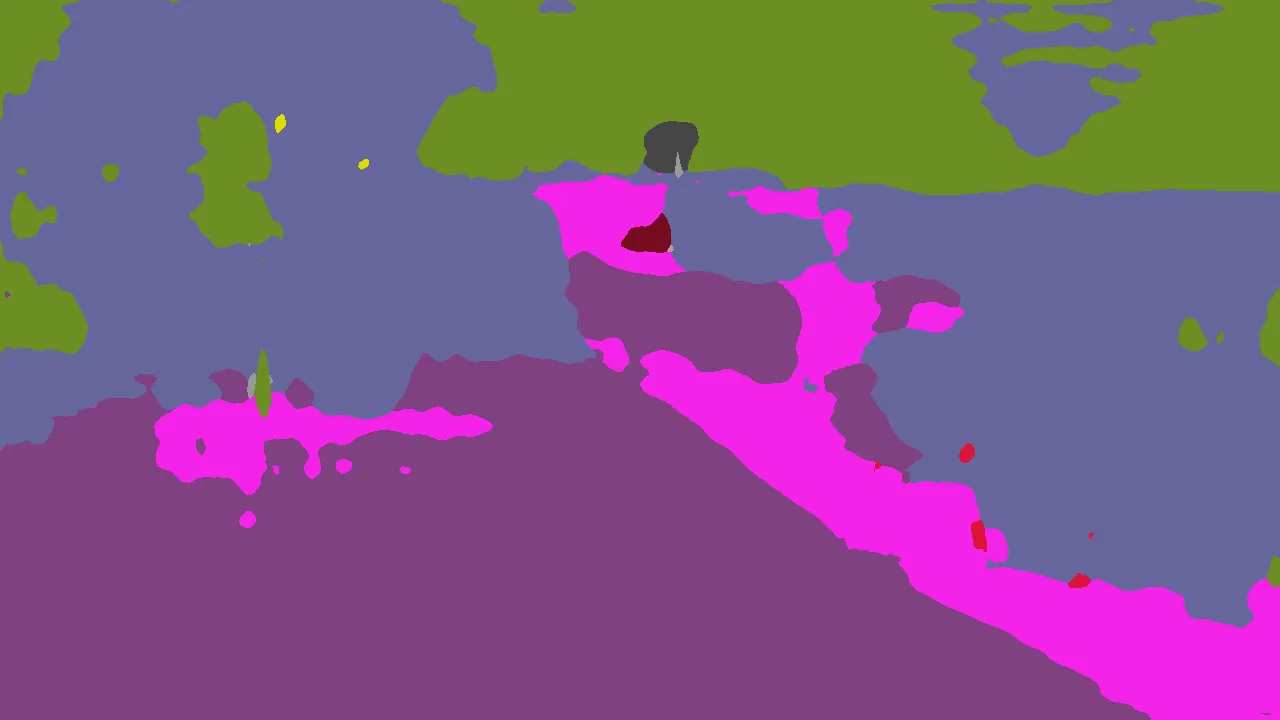


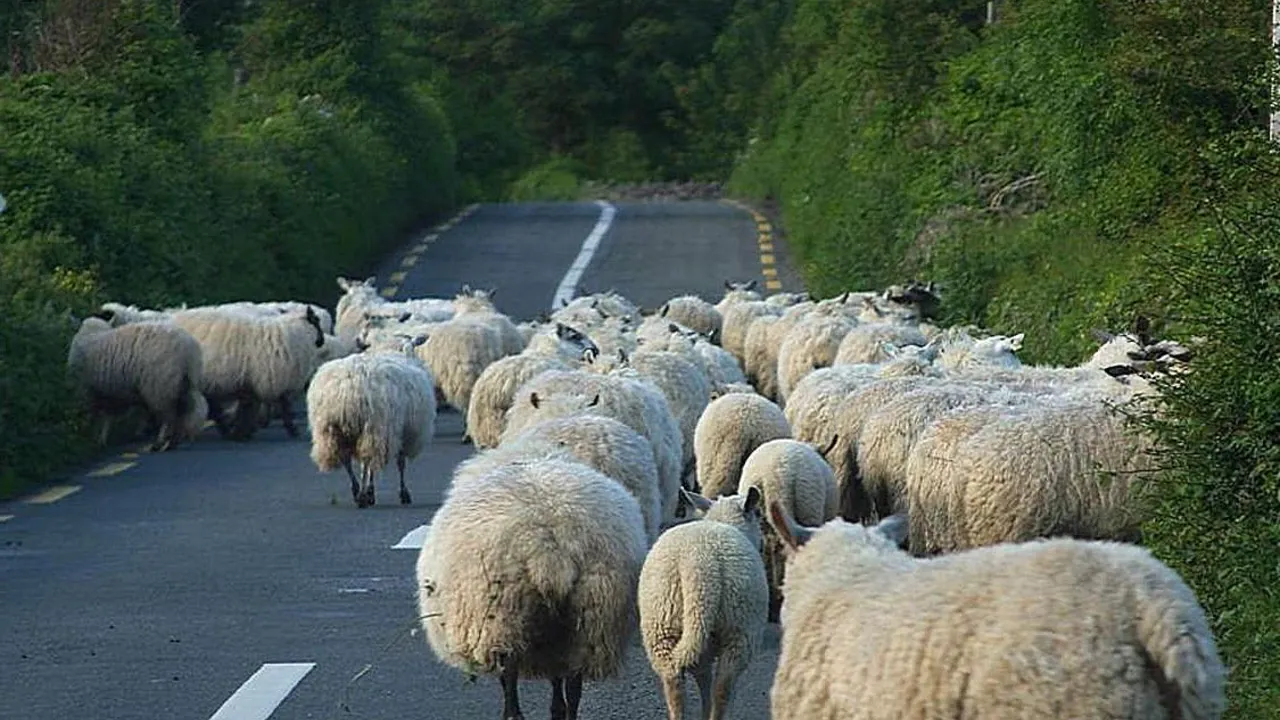
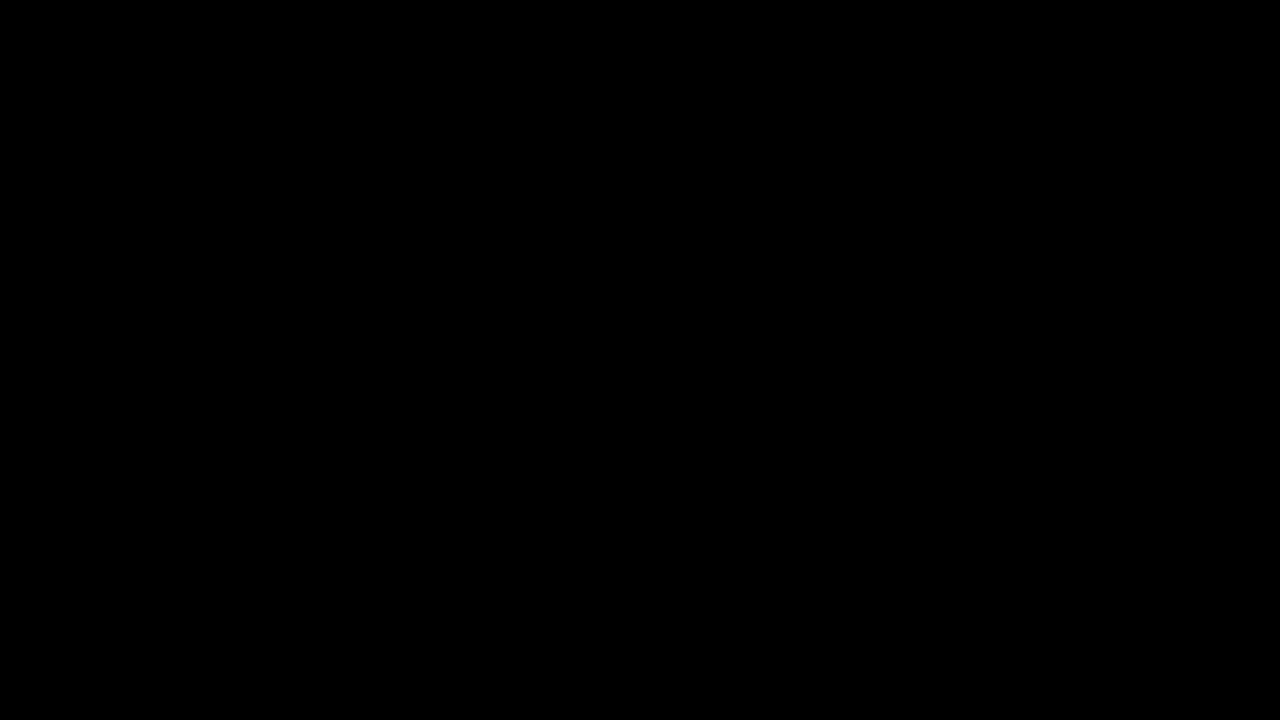
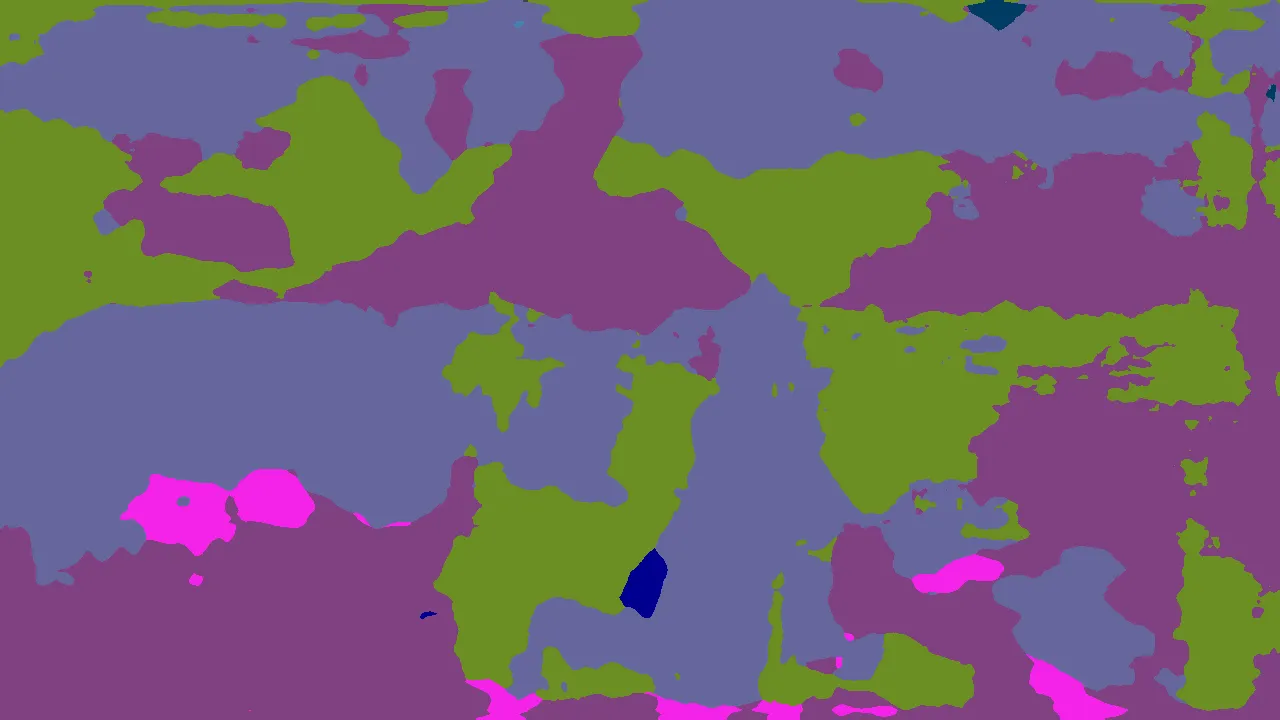


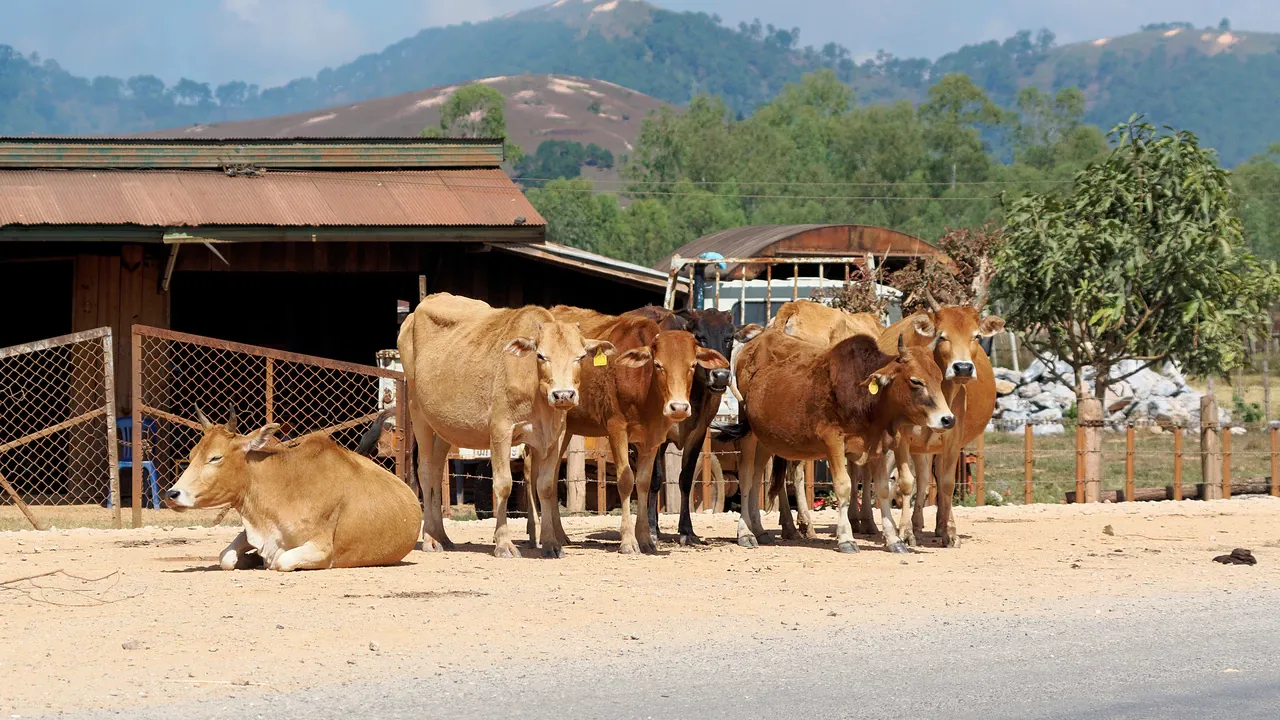
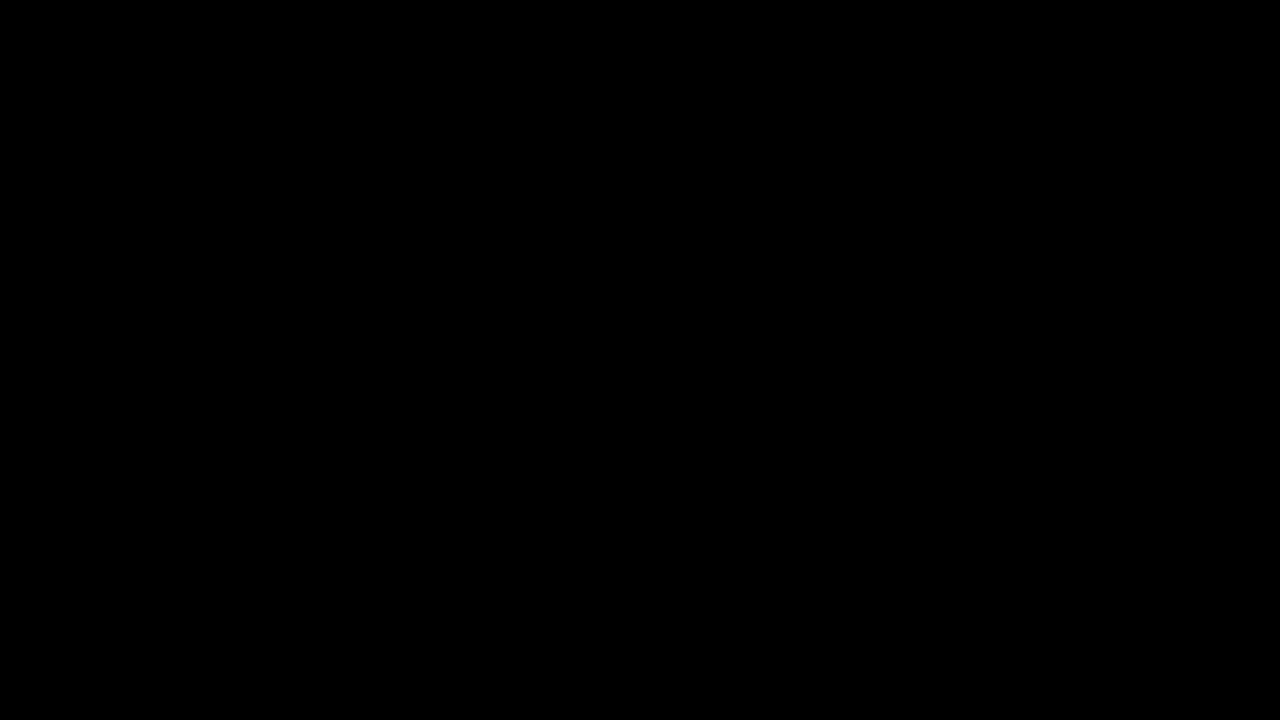
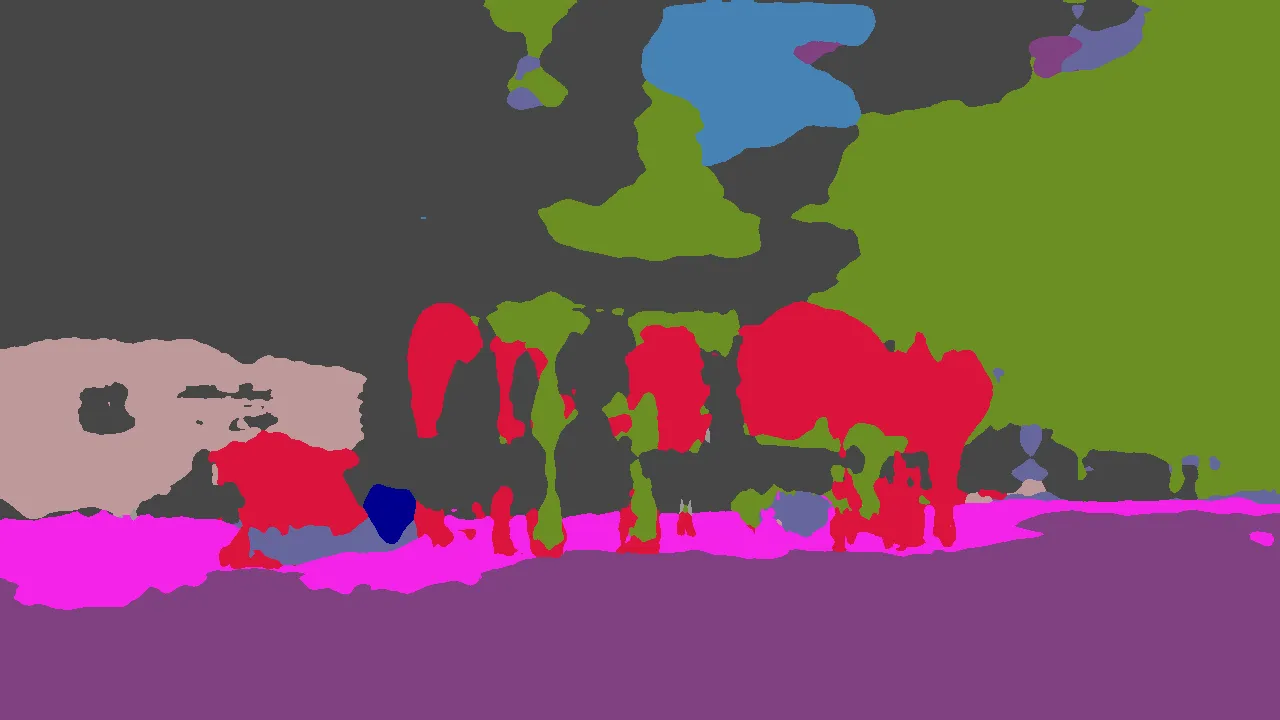

In [5]:
eval_obj.run_semseg(dset, b_show=True)

In [6]:
eval_obj.run_semseg(dset, b_show=False)

100%|██████████| 60/60 [00:05<00:00, 10.91it/s]


## Generate images with Pix2PixHD

In [7]:
eval_obj.init_gen_image()

In [8]:
eval_obj.run_gen_image(dset, b_show=True)

KeyboardInterrupt: 

In [9]:
eval_obj.run_gen_image(dset, b_show=False)

  0%|          | 0/60 [00:00<?, ?it/s]/home/tzh005/detecting-the-unexpected/src/pipeline/pipeline.py:55: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return default_collate_edited([torch.as_tensor(b) for b in batch])
/home/tzh005/detecting-the-unexpected/src/pipeline/pipeline.py:46: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/home/tzh005/

## Run anomaly detectors

In [10]:
# eval_obj.run_detector('rbm', dset, b_show=True)

Loading checkpoint found at /home/tzh005/detecting-the-unexpected/exp/0521_Diff_SwapFgd_ImgAndLabelVsGen_semGT/chk_best.pth
Building net


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading weights from checkpoint


/home/tzh005/detecting-the-unexpected/src/pipeline/pipeline.py:55: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return default_collate_edited([torch.as_tensor(b) for b in batch])



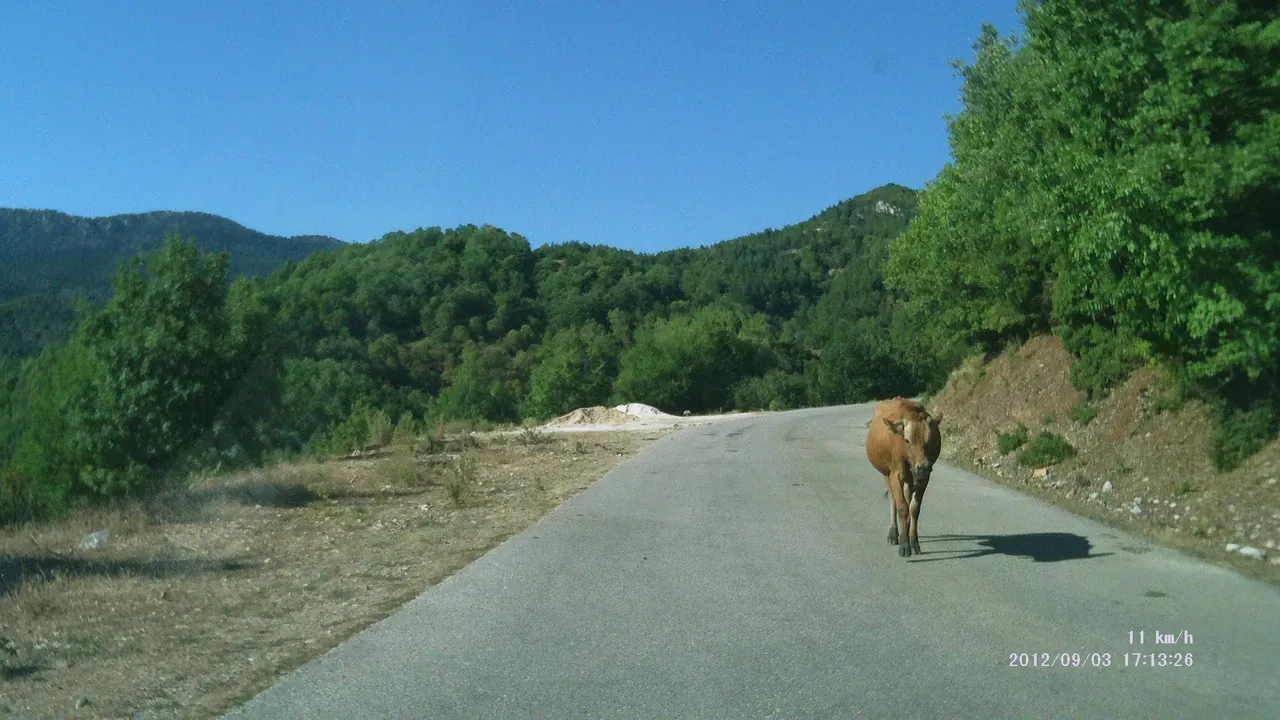
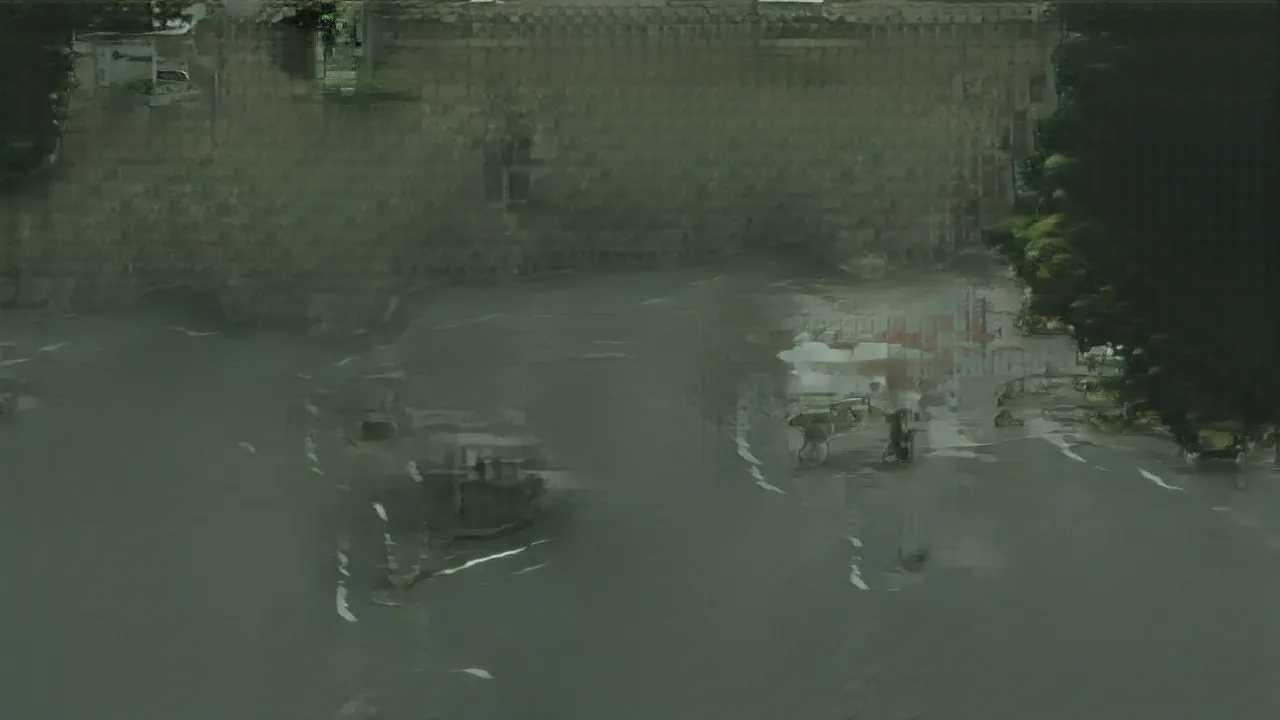
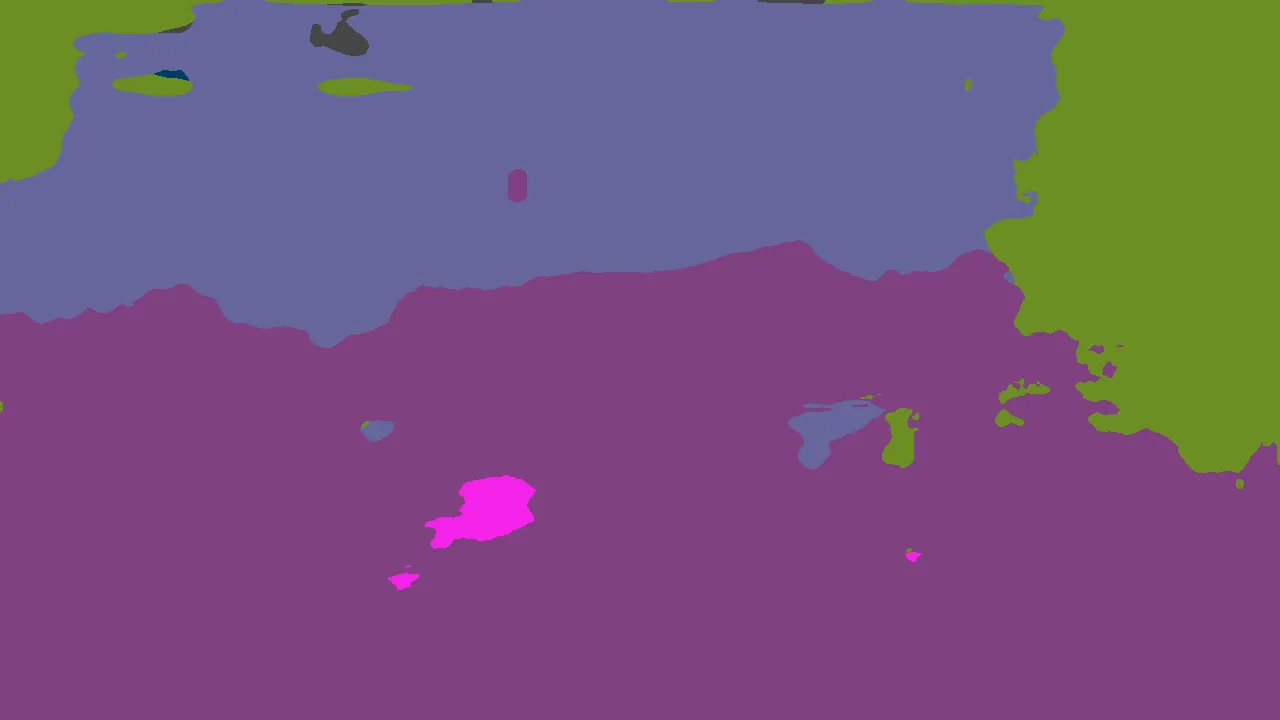
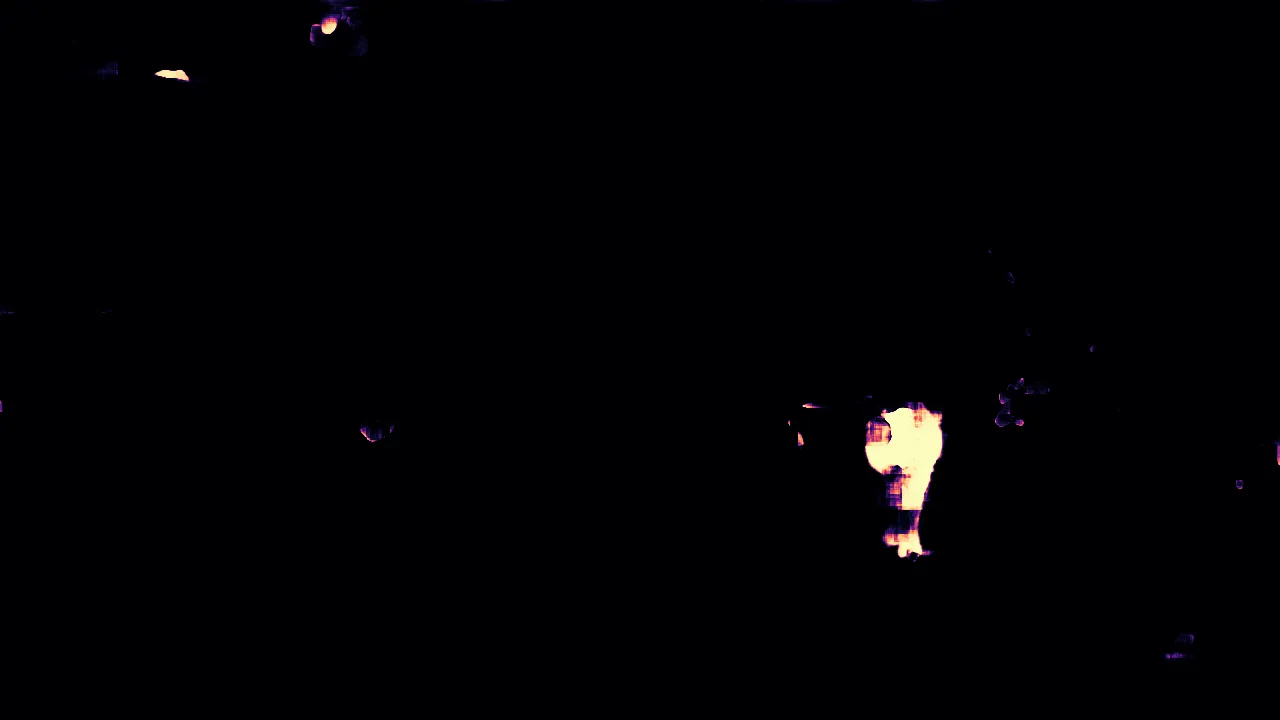


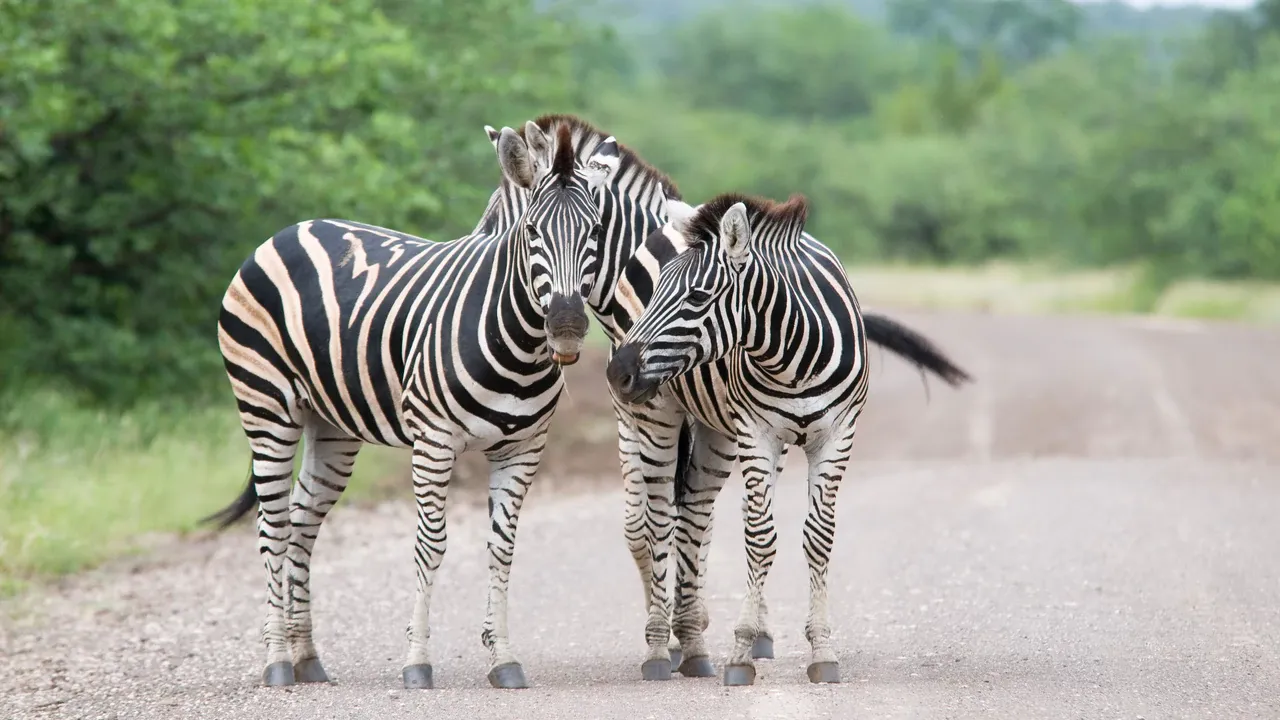
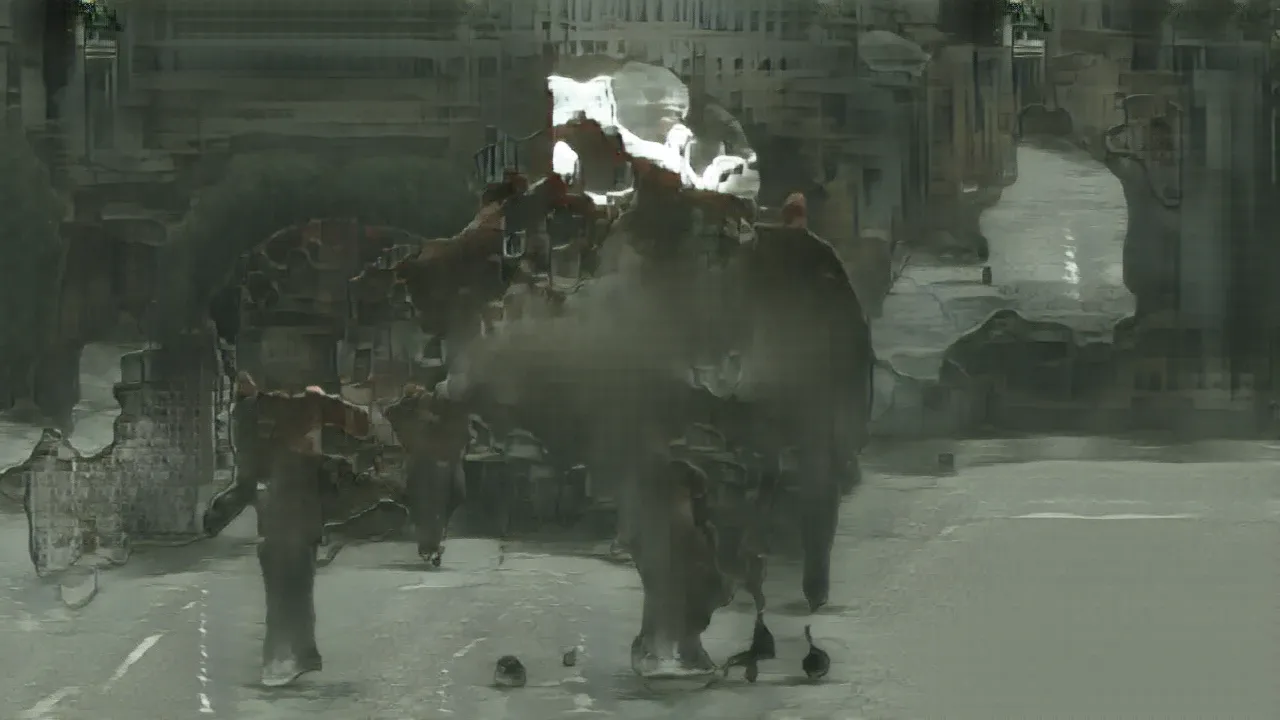
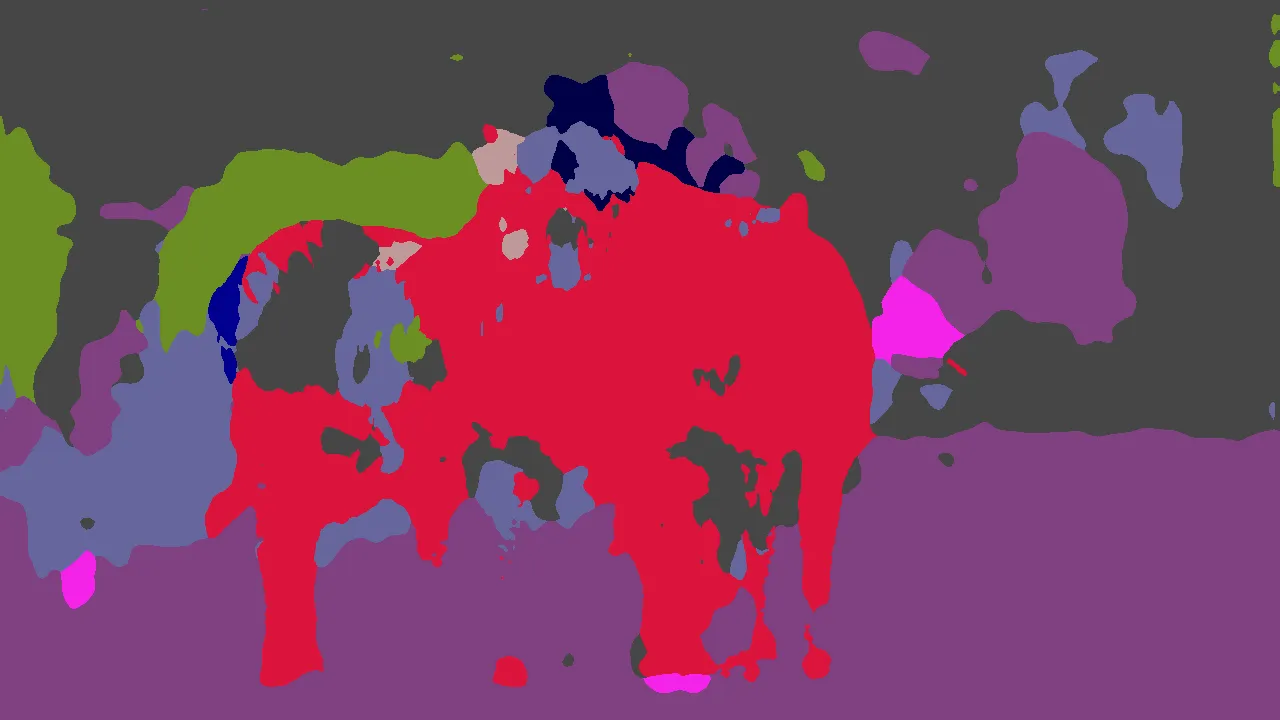
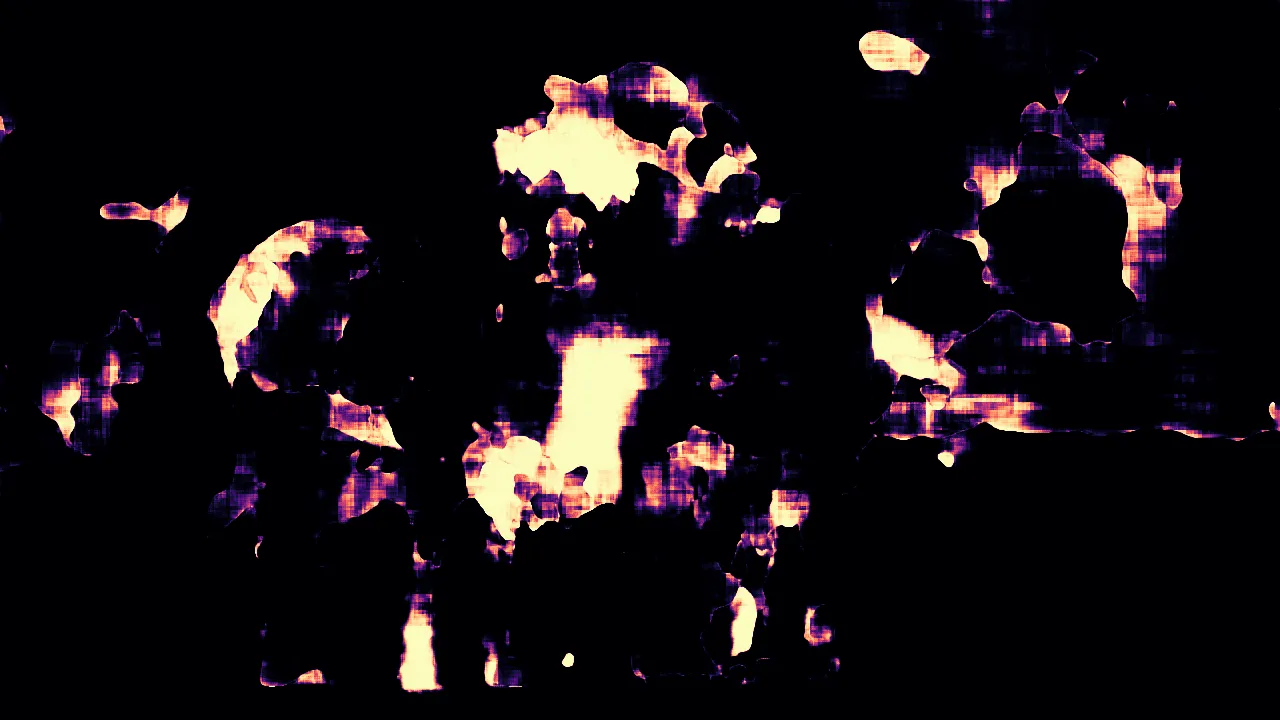


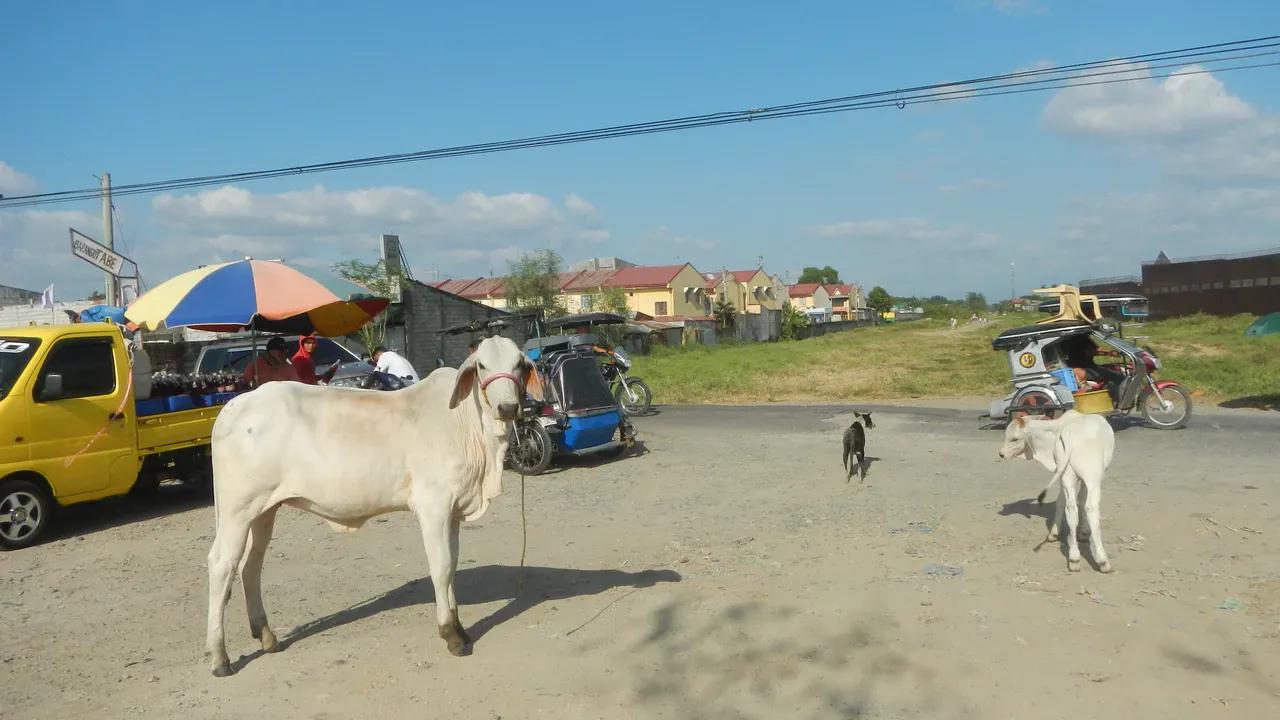
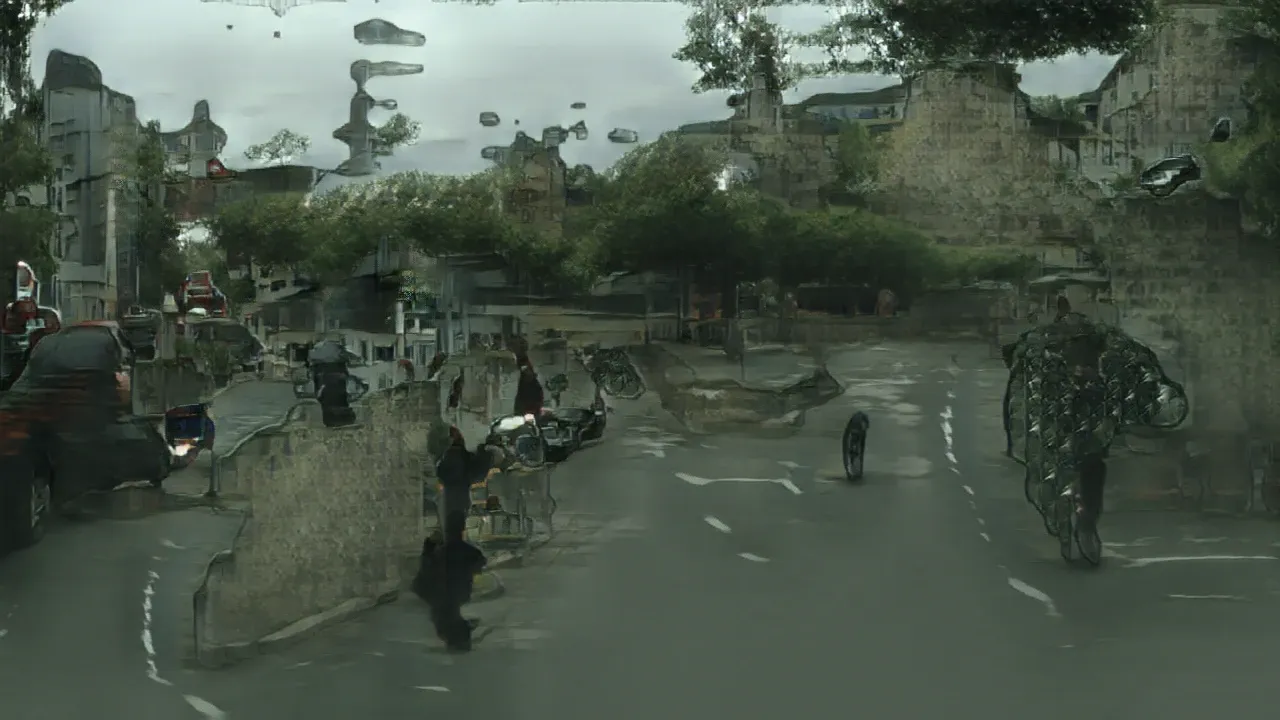
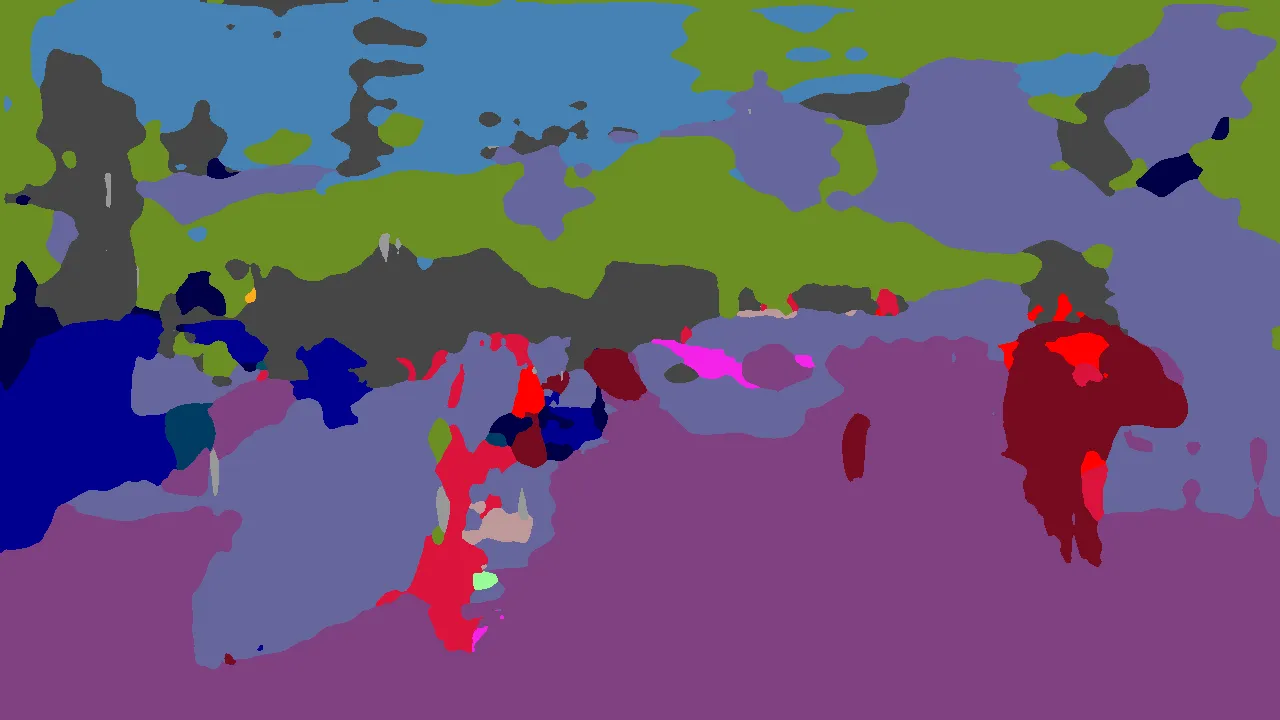
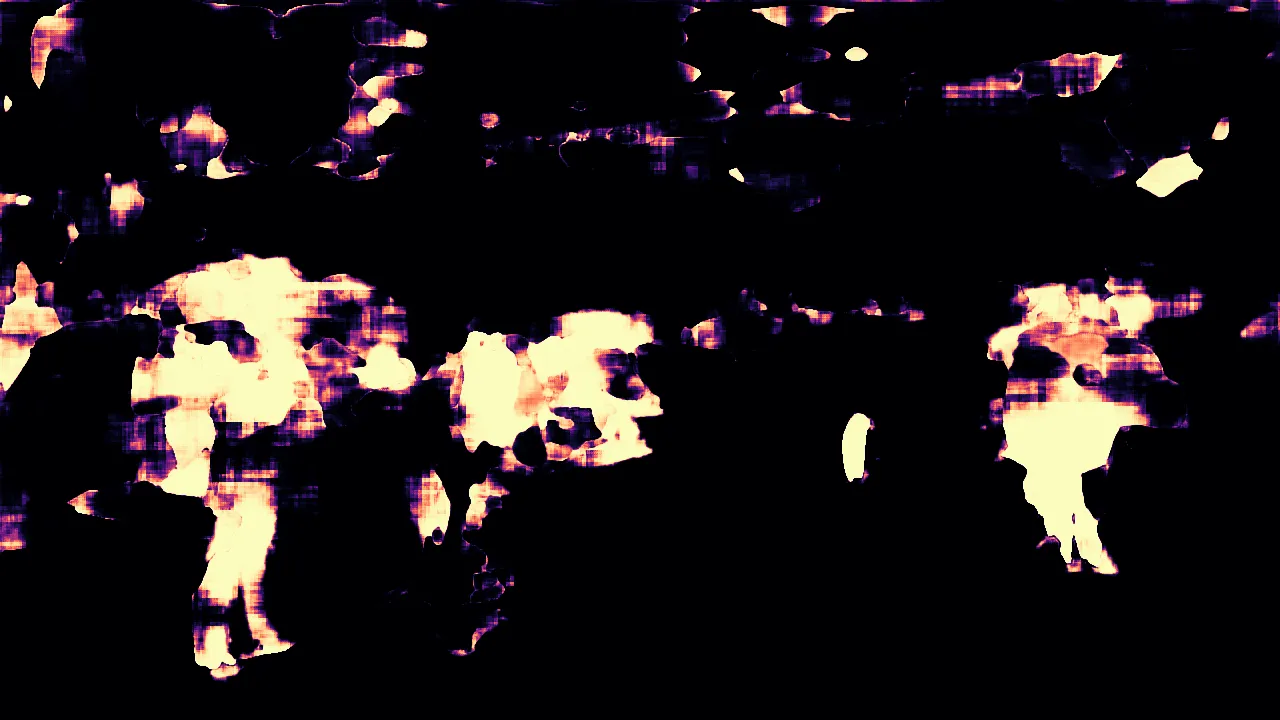

In [11]:
eval_obj.run_detector('discrepancy_label_and_gen', dset, b_show=True)

In [12]:
# run all detectors and store anomaly scores
eval_obj.run_detector_all(dset)

Running detector discrepancy_gen_only
Out file for discrepancy_gen_only already exists - skipping
Running detector discrepancy_label_only
Out file for discrepancy_label_only already exists - skipping
Running detector discrepancy_label_and_gen
Out file for discrepancy_label_and_gen already exists - skipping
Running detector rbm
Out file for rbm already exists - skipping


## Draw demo images


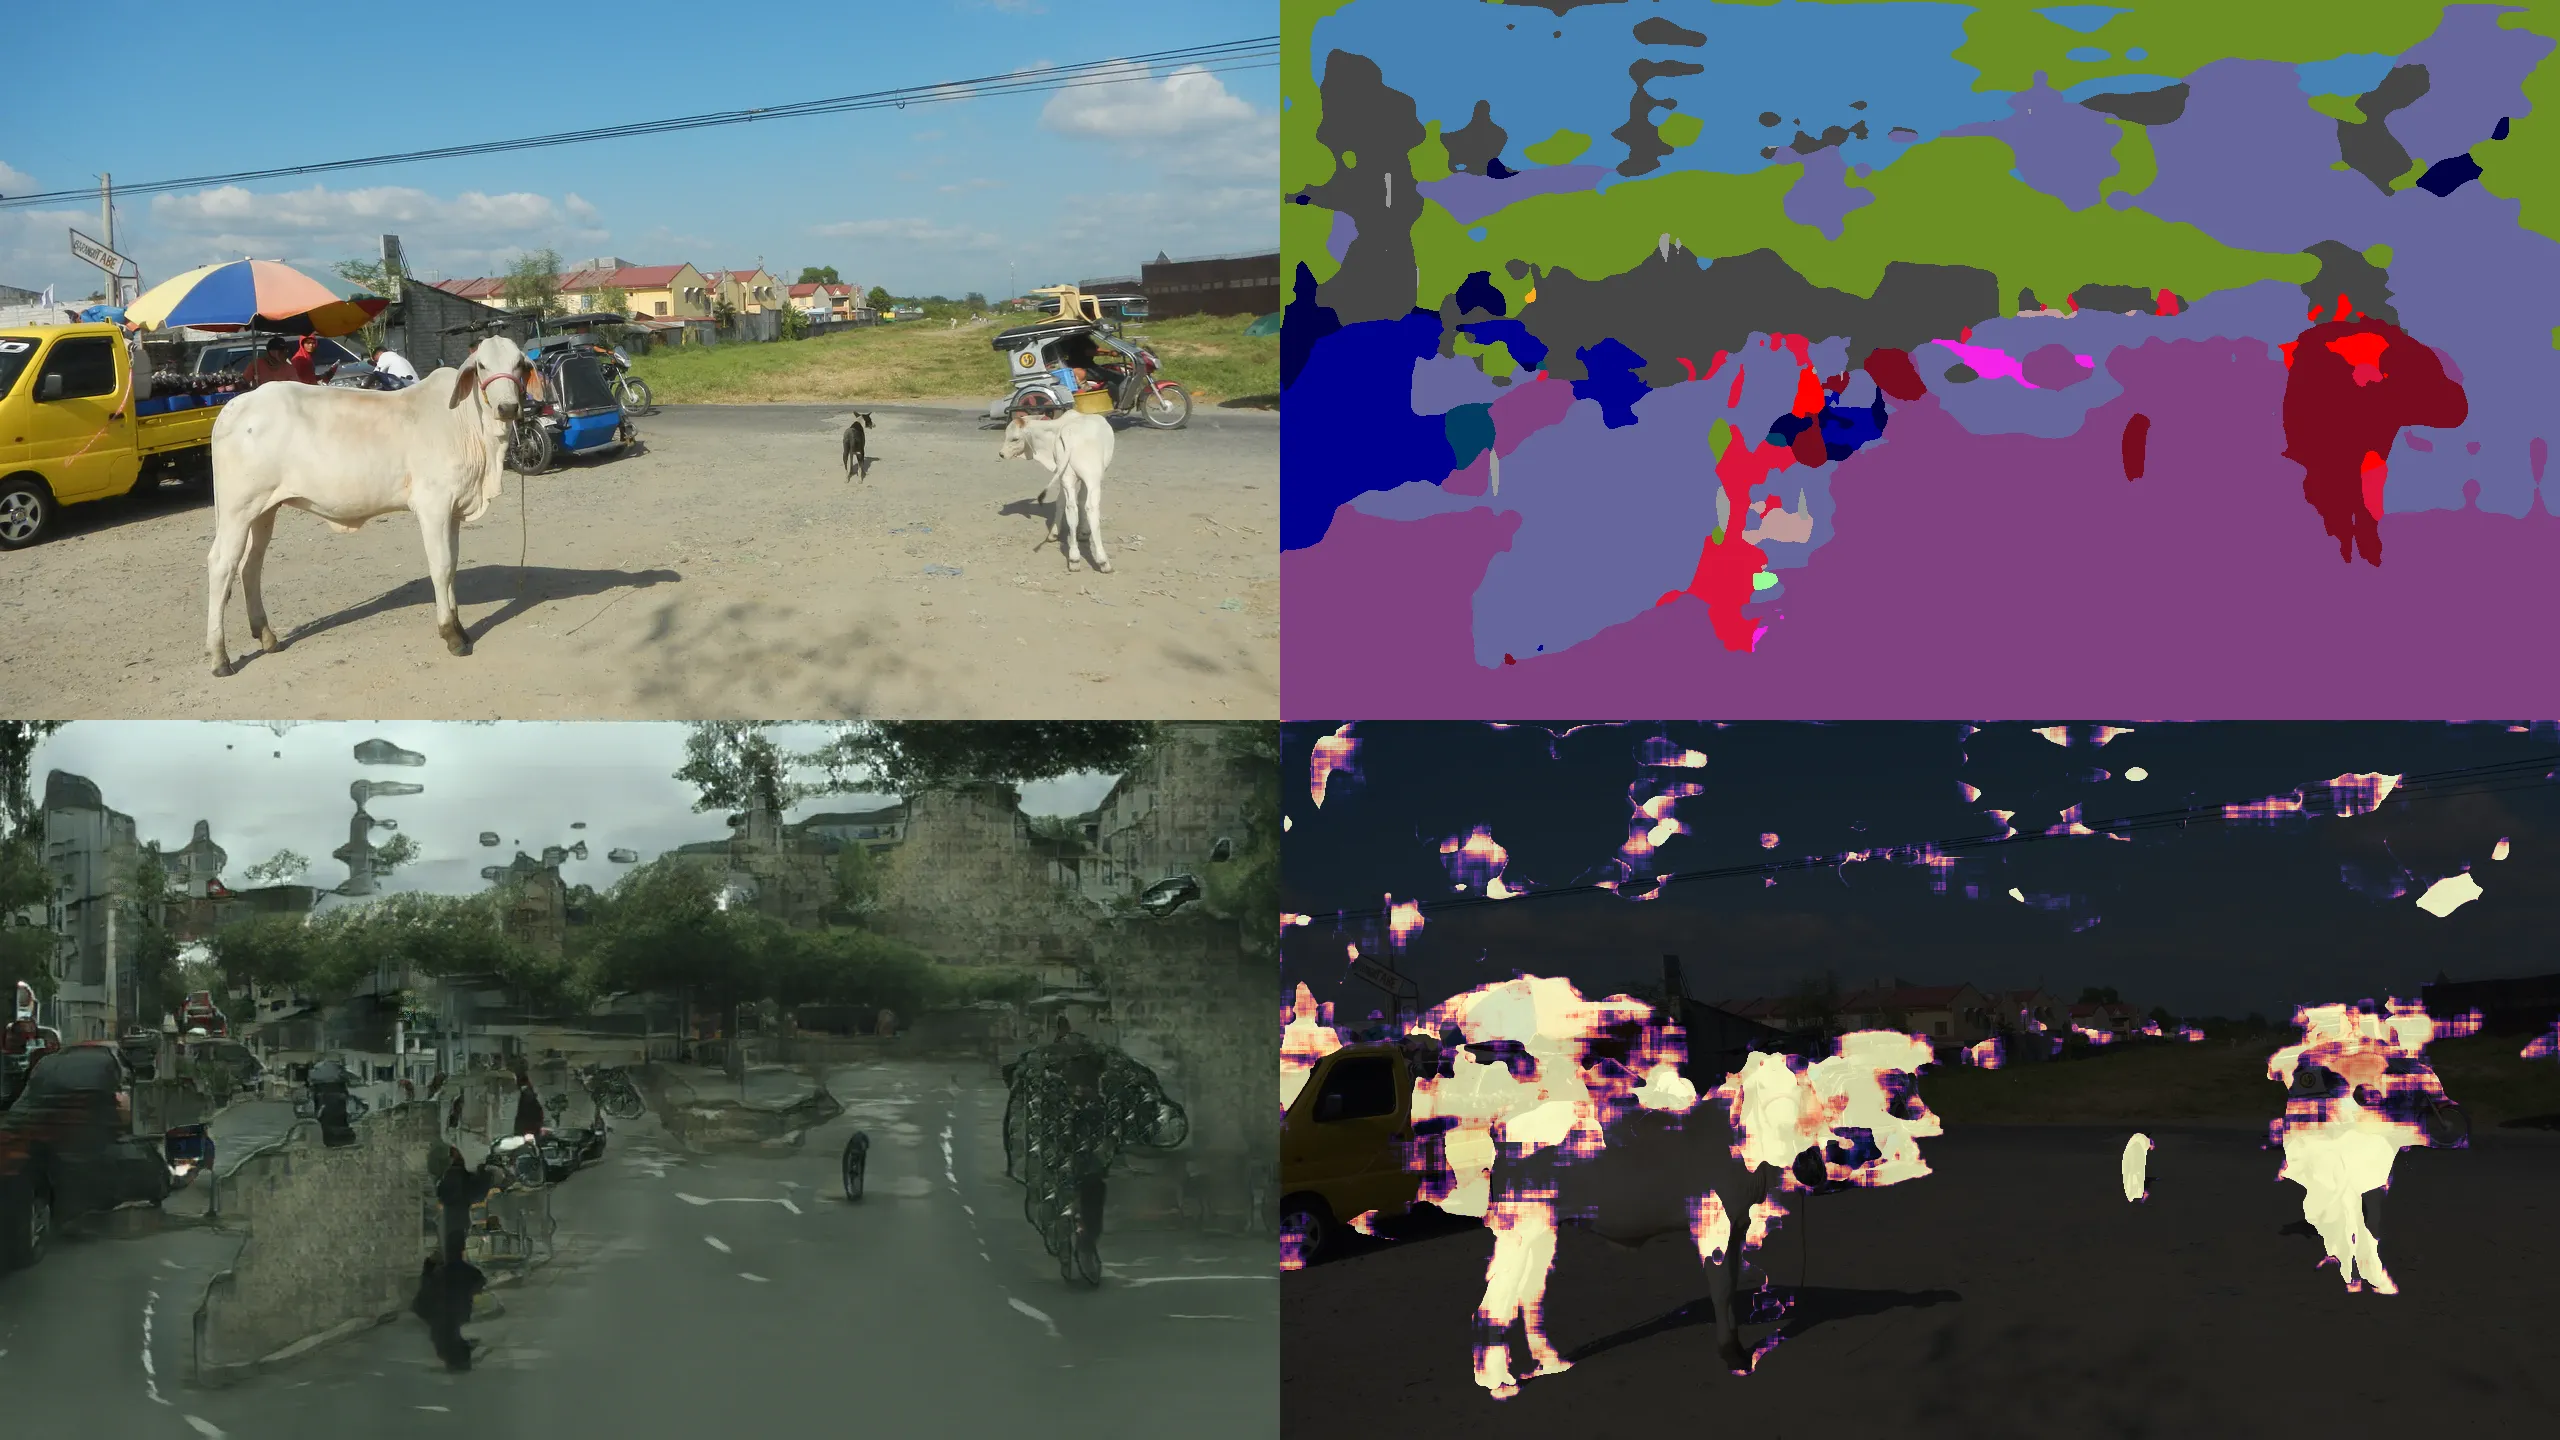
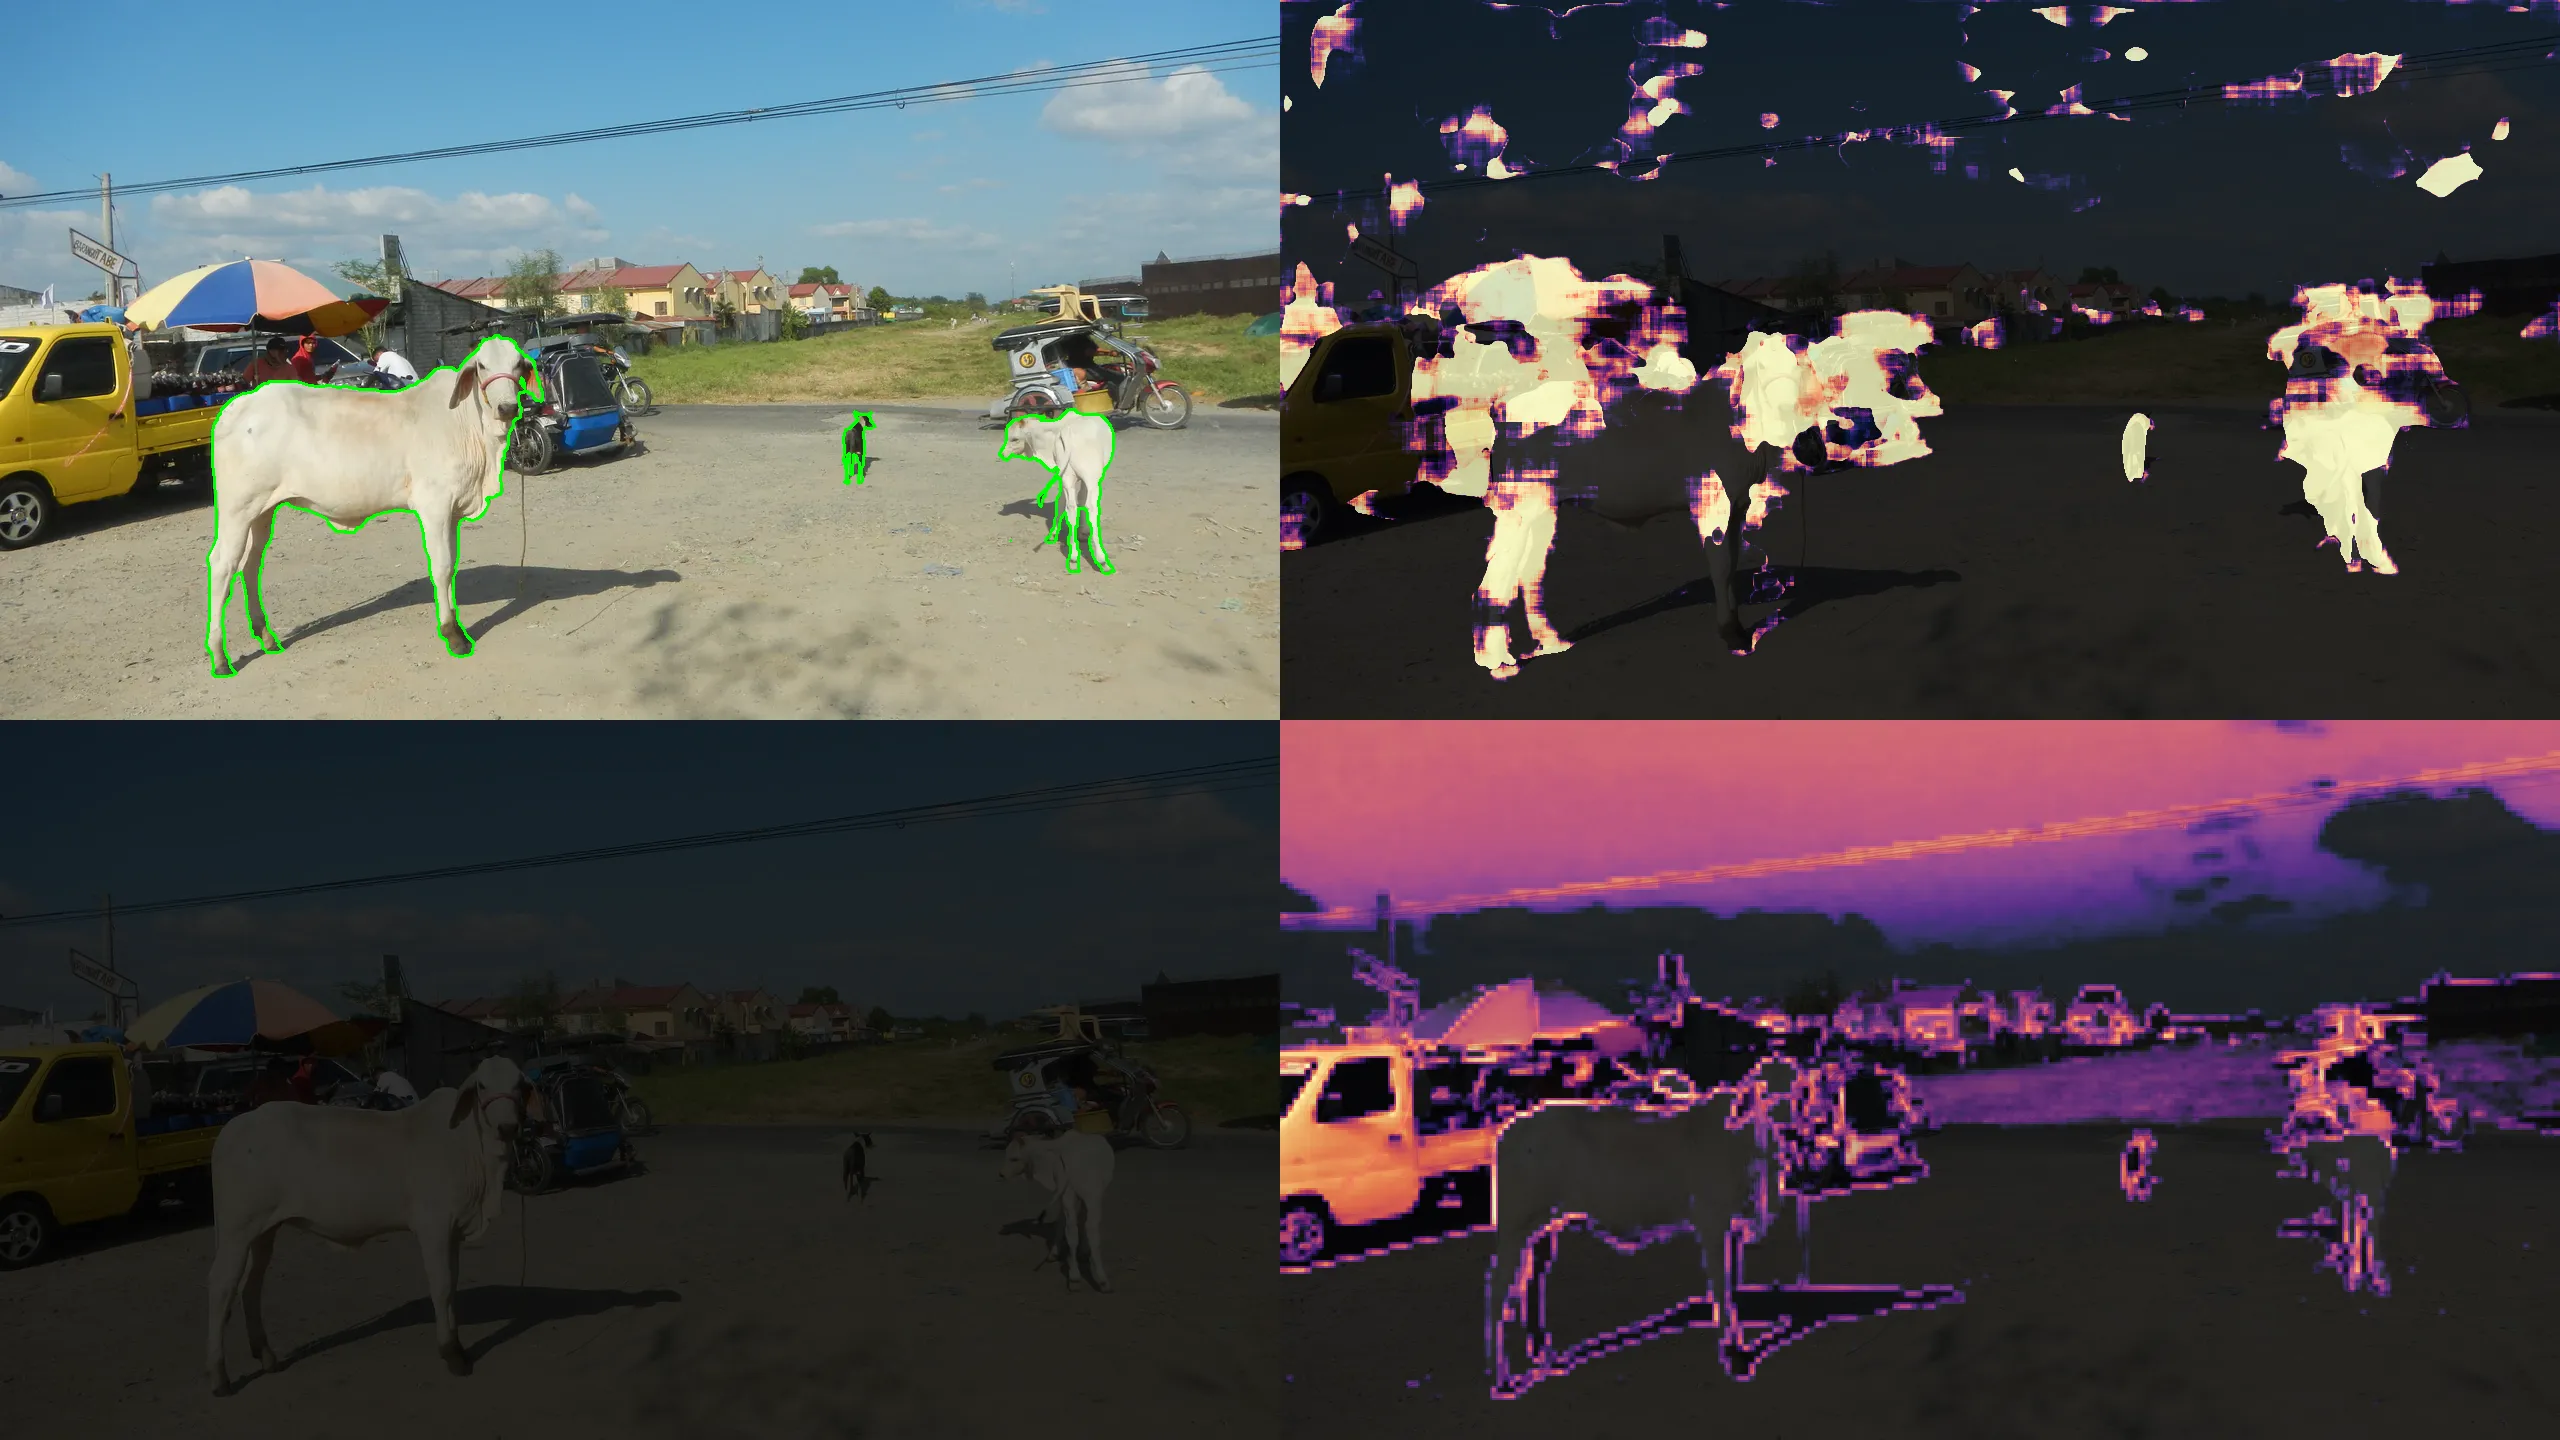

In [13]:
eval_obj.run_demo_imgs(dset, b_show=True)

In [ ]:
eval_obj.run_demo_imgs(dset, b_show=False)

## ROCs

In [14]:
eval_obj.anomaly_detector_variants

['discrepancy_gen_only',
 'discrepancy_label_and_gen',
 'discrepancy_label_only',
 'dropout',
 'rbm']

In [15]:
rocinfos = eval_obj.run_roc_curves_for_variant(dset)

Discovered 60 frames - DatasetFrameList()
Saving /home/tzh005/detecting-the-unexpected/exp/0500_Eval/road_anomaly_test/sem_BaySegBdd/anomaly_roc/discrepancy_gen_only_roc.hdf5
Saving /home/tzh005/detecting-the-unexpected/exp/0500_Eval/road_anomaly_test/sem_BaySegBdd/anomaly_roc/discrepancy_label_and_gen_roc.hdf5
Saving /home/tzh005/detecting-the-unexpected/exp/0500_Eval/road_anomaly_test/sem_BaySegBdd/anomaly_roc/discrepancy_label_only_roc.hdf5
Saving /home/tzh005/detecting-the-unexpected/exp/0500_Eval/road_anomaly_test/sem_BaySegBdd/anomaly_roc/dropout_roc.hdf5
Saving /home/tzh005/detecting-the-unexpected/exp/0500_Eval/road_anomaly_test/sem_BaySegBdd/anomaly_roc/rbm_roc.hdf5


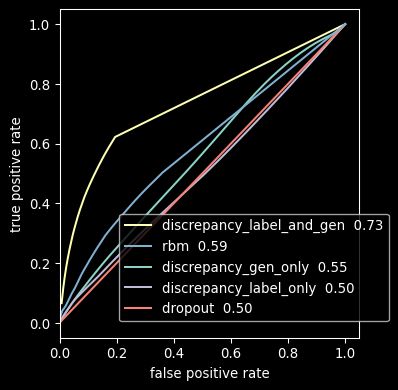

In [16]:
eval_obj.roc_plot_variants(dset)